## ROC / Time Plots for MYBENCH: HMMER vs MMSEQS vs MMORESEQS

## MY-BENCHMARK Dataset

In [70]:
### Imports ###
from __future__ import print_function
import sys
import os
import os.path
import psutil
import math
import numpy as np
import pandas as pd
import cv2 as cv
from PIL import Image
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import statsmodels.api as sm
import statistics as stats

In [71]:
### MatPlotLib settings ###

# number or rows/columns to display
pd.options.display.max_rows = 40
pd.options.display.max_columns = 20

# resolution of output
matplotlib.rcParams['figure.dpi'] = 300

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 6 }

matplotlib.rc('font', **font)


In [72]:
### Root Directory ###

database = "mybench"

path_to_db = "data/{}/".format(database)


In [73]:
### Filepaths ###

hmmer_fname            = "{}/hmmer.mybench.p2s.{}.tf".format(path_to_db, "001")

mmseqs_k95_fname1      = "{}/mmseqs.mybench.p2s.k95.{}.tf".format(path_to_db, "001")
mmseqs_k80_fname1      = "{}/mmseqs.mybench.p2s.k80.{}.tf".format(path_to_db, "001")
mmseqs_k75_fname1      = "{}/mmseqs.mybench.p2s.k75.{}.tf".format(path_to_db, "001")

mmseqs_k95_fname2      = "{}/mmseqs.mybench.p2s.k95.{}.tf".format(path_to_db, "002")
mmseqs_k80_fname2      = "{}/mmseqs.mybench.p2s.k80.{}.tf".format(path_to_db, "002")
mmseqs_k75_fname2      = "{}/mmseqs.mybench.p2s.k75.{}.tf".format(path_to_db, "002")

mmseqs_k80_fname3      = "{}/mmseqs.mybench.p2s.k80.{}.tf".format(path_to_db, "003")
mmseqs_k80_fname4      = "{}/mmseqs.mybench.p2s.k80.{}.tf".format(path_to_db, "004")
mmseqs_k80_fname5      = "{}/mmseqs.mybench.p2s.k80.{}.tf".format(path_to_db, "005")

mmore_all_fname        = "{}/mmoreseqs.mybench.p2s.all.{}.tf".format(path_to_db, "404")
mmore_full_fname1      = "{}/mmoreseqs.mybench.p2s.full.{}.tf".format(path_to_db, "001")
mmore_full_fname2      = "{}/mmoreseqs.mybench.p2s.full.{}.tf".format(path_to_db, "002")
mmore_full_fname3      = "{}/mmoreseqs.mybench.p2s.full.{}.tf".format(path_to_db, "003")
mmore_full_fname       = "{}/mmoreseqs.mybench.p2s.full.{}.tf".format(path_to_db, "003")
mmore_nobias_fname     = "{}/mmoreseqs.mybench.p2s.nobias.{}.tf".format(path_to_db, "001")

mmore_all_fname2       = "{}/mmoreseqs.mybench.allout.428A.8.12.tf".format(path_to_db)
mmore_all_fname3       = "{}/mmoreseqs.mybench.all.430A.12.16.tf".format(path_to_db)
mmore_norm_fname2      = "{}/mmoreseqs.mybench.p2s.norm.{}.tf".format(path_to_db, "002")

# mmore_all_fname 
mmore_8e5_fname        = "{}/mmoreseqs.mybench.p2s.8e5.new.{}.tf".format(path_to_db, "001")
mmore_9e4_fname        = "{}/mmoreseqs.mybench.p2s.9e4.new.{}.tf".format(path_to_db, "001")
mmore_2e4_fname        = "{}/mmoreseqs.mybench.p2s.2e4.new.{}.tf".format(path_to_db, "001")

mmore_pall_fname       = "{}/mmoreseqs.mybench.all.tf".format(path_to_db)
mmore_p1e3_fname       = "{}/mmoreseqs.mybench.p1e3.tf".format(path_to_db)
mmore_p8e3_fname       = "{}/mmoreseqs.mybench.p8e3.tf".format(path_to_db)
mmore_p1e4_fname       = "{}/mmoreseqs.mybench.p1e4.tf".format(path_to_db)

# mmore all params
for alpha in [8, 12, 16]:
    for beta in [16, 20, 24]:
        pass 

mmore_a8_b16_fname    = "{}/mmoreseqs.mybench.all.nodom.429A_8_16.8.16.tf".format(path_to_db)
mmore_a8_b20_fname    = "{}/mmoreseqs.mybench.all.nodom.429A_8_20.8.20.tf".format(path_to_db)
mmore_a8_b24_fname    = "{}/mmoreseqs.mybench.all.nodom.429A_8_24.8.24.tf".format(path_to_db)
mmore_a12_b16_fname    = "{}/mmoreseqs.mybench.all.nodom.429A_12_16.12.16.tf".format(path_to_db)
mmore_a12_b20_fname    = "{}/mmoreseqs.mybench.all.nodom.429A_12_20.12.20.tf".format(path_to_db)
mmore_a12_b24_fname    = "{}/mmoreseqs.mybench.all.nodom.429A_12_24.12.24.tf".format(path_to_db)
mmore_a16_b16_fname    = "{}/mmoreseqs.mybench.all.nodom.429A_16_16.16.16.tf".format(path_to_db)
mmore_a16_b20_fname    = "{}/mmoreseqs.mybench.all.nodom.429A_16_20.16.20.tf".format(path_to_db)
mmore_a16_b24_fname    = "{}/mmoreseqs.mybench.all.nodom.429A_16_24.16.24.tf".format(path_to_db)

mmore_a8_b12_fname5    = "{}/mmoreseqs.mybench.505M.8.12.tf".format(path_to_db)
mmore_a12_b20_fname5   = "{}/mmoreseqs.mybench.505M.12.20.tf".format(path_to_db)
mmore_a16_b28_fname5   = "{}/mmoreseqs.mybench.505M.16.28.tf".format(path_to_db)


In [74]:
### Counts ###

# Total Queries and Targets
total_target       =   2017088
total_query        =      3003
total_target_real  =     17088 
total_target_decoy =   2000000

# Total True Positives and Negatives
total_res = 6057315264
total_TP  =      17088
total_TN  = 6006000000
unknown   =   51298176
TP_to_TN  =   2.85e-06


### Time Data

In [75]:
### Runtimes ###
times = {}

# hmmer
times["hmmer"] = {}
times["hmmer"]["search"] = 83035.67

# mmseqs
times["mmseqs"] = {}
# times["mmseqs"]["build"] = 1859.31

times["mmseqs"]["norm"]  = 0
times["mmseqs"]["sens"]  = 0

times["mmseqs"]["k95"]   = 1954.58 
times["mmseqs"]["k80"]   = 3042.64 
times["mmseqs"]["k75"]   = 8778.01

# times["mmseqs"]["k95-user"]   = 12055.59
# times["mmseqs"]["k80-user"]   = 19274.64 
# times["mmseqs"]["k75-user"]   = 30104.80 

# mmoreseqs
times["mmore"] = {}
times["mmore"]["k80"] = {}
times["mmore"]["k80"]["pre"] = times["mmseqs"]["k80"]
mmseqs_pre = times["mmore"]["k80"]["pre"]

times["mmore"]["k80"]["all"]  = 59708.00 + mmseqs_pre
times["mmore"]["k80"]["2e8"]  = 59708.00 + mmseqs_pre
times["mmore"]["k80"]["2e7"]  = 59051.21 + mmseqs_pre
times["mmore"]["k80"]["6e6"]  = 55767.27 + mmseqs_pre
times["mmore"]["k80"]["8e5"]  = 34750.06 + mmseqs_pre
times["mmore"]["k80"]["3e5"]  = 22384.29 + mmseqs_pre
times["mmore"]["k80"]["2e5"]  = 16018.40 + mmseqs_pre
times["mmore"]["k80"]["9e4"]  = 11781.76 + mmseqs_pre 
times["mmore"]["k80"]["6e4"]  =  9264.71 + mmseqs_pre
times["mmore"]["k80"]["4e4"]  =  7322.35 + mmseqs_pre
times["mmore"]["k80"]["2e4"]  =  7322.35 + mmseqs_pre

# mmoreseqs (approximates that need to be run again)
times["mmore"]["k80"]["all"]     = 59892.70 + mmseqs_pre
times["mmore"]["k80"]["p8e3"]    = 59051.21 + mmseqs_pre
times["mmore"]["k80"]["p1e3"]    =  6103.02 + mmseqs_pre
times["mmore"]["k80"]["p1e4"]    =   722.71 + mmseqs_pre

# mmseqs params
times["mmore"]["k80"]["a8b16"]   = 9485.98 + mmseqs_pre
times["mmore"]["k80"]["a8b20"]   = 10829.7 + mmseqs_pre
times["mmore"]["k80"]["a8b24"]   = 11599.4 + mmseqs_pre
times["mmore"]["k80"]["a12b16"]  = 11599.4 + mmseqs_pre
times["mmore"]["k80"]["a12b20"]  = 11599.4 + mmseqs_pre
times["mmore"]["k80"]["a12b24"]  = 11599.4 + mmseqs_pre
times["mmore"]["k80"]["a16b16"]  = 11599.4 + mmseqs_pre
times["mmore"]["k80"]["a16b20"]  = 11599.4 + mmseqs_pre
times["mmore"]["k80"]["a16b24"]  = 13582.3 + mmseqs_pre

# Load Data

### ROC Plots

In [76]:
labels = []
datas = []
runtimes = []

# set header format
tf_dformat = {
    "target_name": "str",
    "query_name": "str",
    "eval": "float",
    "truth": "str",
    "tot_T": "int",
    "tot_F": "int",
    "tot_?": "int"
}
tf_header = tf_dformat.keys()

# load data
usecols = [0,1,2,3,4,5]
skiprows = None
sep = " "
names = tf_header

In [77]:
name = "hmmer"
hmmer_data = pd.read_csv( hmmer_fname, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append( hmmer_data )
labels.append( "HMMER" )
runtimes.append( times["hmmer"]["search"] )

In [78]:
mmseqs_k75_data1 = pd.read_csv( mmseqs_k75_fname1, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append( mmseqs_k75_data1 )
labels.append( "MMSEQS (k75) [1]" )
runtimes.append( times["mmseqs"]["k75"] )

mmseqs_k80_data1 = pd.read_csv( mmseqs_k80_fname1, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_k80_data1)
labels.append( "MMSEQS (k80) [1]" )
runtimes.append( times["mmseqs"]["k80"] )

mmseqs_k95_data1 = pd.read_csv( mmseqs_k95_fname1, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_k95_data1)
labels.append( "MMSEQS (k95) [1]" )
runtimes.append( times["mmseqs"]["k95"] )

In [79]:
mmseqs_k75_data2 = pd.read_csv( mmseqs_k75_fname2, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_k75_data2)
labels.append( "MMSEQS (k75) [2]" )
runtimes.append( times["mmseqs"]["k75"] )

mmseqs_k80_data2 = pd.read_csv( mmseqs_k80_fname2, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_k80_data2)
labels.append( "MMSEQS (k80) [2]" )
runtimes.append( times["mmseqs"]["k80"] )

mmseqs_k95_data2 = pd.read_csv( mmseqs_k95_fname2, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_k95_data2)
labels.append( "MMSEQS (k95) [2]" )
runtimes.append( times["mmseqs"]["k95"] )

In [80]:
mmseqs_k80_data3 = pd.read_csv( mmseqs_k80_fname3, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_k80_data3)
labels.append( "MMSEQS (k80-S2S) [3]" )
runtimes.append( times["mmseqs"]["k80"] )

In [81]:
mmseqs_k80_data4 = pd.read_csv( mmseqs_k80_fname4, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_k80_data4)
labels.append( "MMSEQS (k80-P2S) [4]" )
runtimes.append( times["mmseqs"]["k80"] )

In [82]:
mmseqs_k80_data5 = pd.read_csv( mmseqs_k80_fname5, sep=sep, header=None, skiprows=skiprows, usecols=usecols, names=names, index_col=False, verbose=False )
datas.append(mmseqs_k80_data5)
labels.append( "MMSEQS (k80-P2S) [5]" )
runtimes.append( times["mmseqs"]["k80"] )

In [83]:
mmore_all_data = pd.read_csv( mmore_all_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_all_data)
labels.append( "MMORE (ALL)" )
runtimes.append( times["mmore"]["k80"]["all"] )

mmore_nobias_data = pd.read_csv( mmore_nobias_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_nobias_data)
labels.append( "MMORE (NO BIAS)" )
runtimes.append( -np.inf )

mmore_full_data = pd.read_csv( mmore_full_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_full_data)
labels.append( "MMORE (FULL FWDBACK)" )
runtimes.append( -np.inf )


In [84]:
mmore_8e5_data = pd.read_csv( mmore_8e5_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_8e5_data)
labels.append( "MMORE (e8e5)" )
runtimes.append( times["mmore"]["k80"]["8e5"] )

mmore_9e4_data = pd.read_csv( mmore_9e4_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_9e4_data)
labels.append( "MMORE (e9e4)" )
runtimes.append( times["mmore"]["k80"]["9e4"] )

mmore_2e4_data = pd.read_csv( mmore_2e4_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_2e4_data)
labels.append( "MMORE (e2e4)" )
runtimes.append( times["mmore"]["k80"]["2e4"] )


In [85]:
mmore_pall_data = pd.read_csv( mmore_pall_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_pall_data)
labels.append( "MMORE (pALL) [1]" )
runtimes.append( times["mmore"]["k80"]["all"] )

mmore_p1e4_data = pd.read_csv( mmore_p1e4_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p1e4_data)
labels.append( "MMORE (p1e4)" )
runtimes.append( times["mmore"]["k80"]["p1e4"] )

mmore_p8e3_data = pd.read_csv( mmore_p8e3_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p8e3_data)
labels.append( "MMORE (p8e3)" )
runtimes.append( times["mmore"]["k80"]["p8e3"] )

mmore_p1e3_data = pd.read_csv( mmore_p1e3_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_p1e3_data)
labels.append( "MMORE (p1e3)" )
runtimes.append( times["mmore"]["k80"]["p1e3"] )


In [86]:
mmore_pall_data2 = pd.read_csv( mmore_all_fname2, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_pall_data2)
labels.append( "MMORE (pALL) [2]" )
runtimes.append( times["mmore"]["k80"]["all"] )

mmore_pall_data3 = pd.read_csv( mmore_all_fname3, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_pall_data3)
labels.append( "MMORE (pALL) [3]" )
runtimes.append( times["mmore"]["k80"]["all"] )

In [87]:
mmore_a8_b16_data = pd.read_csv( mmore_a8_b16_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_a8_b16_data)
labels.append( "MMORE (8,16)" )
runtimes.append( times["mmore"]["k80"]["a8b16"] )

mmore_a8_b20_data = pd.read_csv( mmore_a8_b20_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_a8_b20_data)
labels.append( "MMORE (8,20)" )
runtimes.append( times["mmore"]["k80"]["a8b20"] )

mmore_a8_b24_data = pd.read_csv( mmore_a8_b24_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_a8_b24_data)
labels.append( "MMORE (8,24)" )
runtimes.append( times["mmore"]["k80"]["a8b24"] )

mmore_a12_b16_data = pd.read_csv( mmore_a12_b16_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_a12_b16_data)
labels.append( "MMORE (12,16)" )
runtimes.append( times["mmore"]["k80"]["a12b16"] )

mmore_a12_b20_data = pd.read_csv( mmore_a12_b20_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_a12_b20_data)
labels.append( "MMORE (12,20)" )
runtimes.append( times["mmore"]["k80"]["a12b20"] )

mmore_a12_b24_data = pd.read_csv( mmore_a12_b24_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_a12_b24_data)
labels.append( "MMORE (12,24)" )
runtimes.append( times["mmore"]["k80"]["a12b24"] )

mmore_a16_b16_data = pd.read_csv( mmore_a16_b16_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_a16_b16_data)
labels.append( "MMORE (16,16)" )
runtimes.append( times["mmore"]["k80"]["a16b16"] )

mmore_a16_b20_data = pd.read_csv( mmore_a16_b20_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_a16_b20_data)
labels.append( "MMORE (16,20)" )
runtimes.append( times["mmore"]["k80"]["a16b20"] )

mmore_a16_b24_data = pd.read_csv( mmore_a16_b24_fname, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_a16_b24_data)
labels.append( "MMORE (16,24)" )
runtimes.append( times["mmore"]["k80"]["a16b24"] )

In [88]:
mmore_a8_b12_data5 = pd.read_csv( mmore_a8_b12_fname5, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_a8_b12_data5)
labels.append( "MMORE (8,12) [5]" )
runtimes.append( times["mmore"]["k80"]["a8b16"] )

mmore_a12_b20_data5 = pd.read_csv( mmore_a12_b20_fname5, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_a12_b20_data5)
labels.append( "MMORE (12,20) [5]" )
runtimes.append( times["mmore"]["k80"]["a12b20"] )

mmore_a16_b28_data5 = pd.read_csv( mmore_a16_b28_fname5, sep=sep, header=None, skiprows=skiprows, usecols = usecols, names=names, index_col=False, verbose=False, error_bad_lines=False )
datas.append(mmore_a16_b28_data5)
labels.append( "MMORE (16,28) [5]" )
runtimes.append( times["mmore"]["k80"]["a16b24"] )

In [89]:
for data in datas:
    data["roc_y"] = data["tot_T"] / total_TP
    data["roc_x"] = data["tot_F"] / total_query

In [90]:
# find first false positive
auc_ffps = []

for data in datas:
    ffp = data[ data["tot_F"] > 0 ].iloc[0]["roc_y"]
    auc_ffps.append(ffp)
    
print(auc_ffps)

[0.6846910112359551, 0.21769662921348315, 0.19639513108614232, 0.19083567415730338, 0.19563436329588016, 0.206811797752809, 0.17995084269662923, 0.243562734082397, 0.31203183520599254, 0.31209035580524347, 0.41760299625468167, 0.3059456928838951, 0.3469686329588015, 0.4174274344569288, 0.41327247191011235, 0.40730337078651685, 0.41754447565543074, 0.4297752808988764, 0.4174859550561798, 0.41058052434456926, 0.42965823970037453, 0.3919124531835206, 0.40098314606741575, 0.4064255617977528, 0.40648408239700373, 0.39612593632958804, 0.40133426966292135, 0.4013927902621723, 0.39618445692883897, 0.4013927902621723, 0.4015683520599251, 0.39015683520599254, 0.39103464419475653, 0.33596676029962547]


In [121]:
# 1% false recovery
auc_fdrs = []

for data in datas:
    fdr = data[ (data["tot_F"]/data["tot_T"]) > 0.01 ].iloc[0]["roc_y"]
    auc_fdrs.append(fdr)
    
print(auc_fdrs)

[0.761938202247191, 0.30816947565543074, 0.28698501872659177, 0.2900866104868914, 0.25602762172284643, 0.27165262172284643, 0.2777387640449438, 0.3213951310861423, 0.38664559925093633, 0.38260767790262173, 0.5, 0.5050327715355806, 0.529435861423221, 0.4993562734082397, 0.49180711610486894, 0.4808637640449438, 0.5, 0.46079119850187267, 0.49959035580524347, 0.48735955056179775, 0.4755383895131086, 0.47670880149812733, 0.4851357677902622, 0.4853698501872659, 0.4855454119850187, 0.4895248127340824, 0.4899929775280899, 0.49005149812734083, 0.4897003745318352, 0.4903441011235955, 0.49057818352059923, 0.48414091760299627, 0.49877106741573035, 0.5026334269662921]


# Plots

In [92]:
safe_colors = ['#161925', '#EF5A39', '#602661', '#12c5a7', '#082a6a', '#cbcbcb', '#e926ef', '#fdcfb7' ]
safe_colors_pastel = ['', '', '', '', '', ]

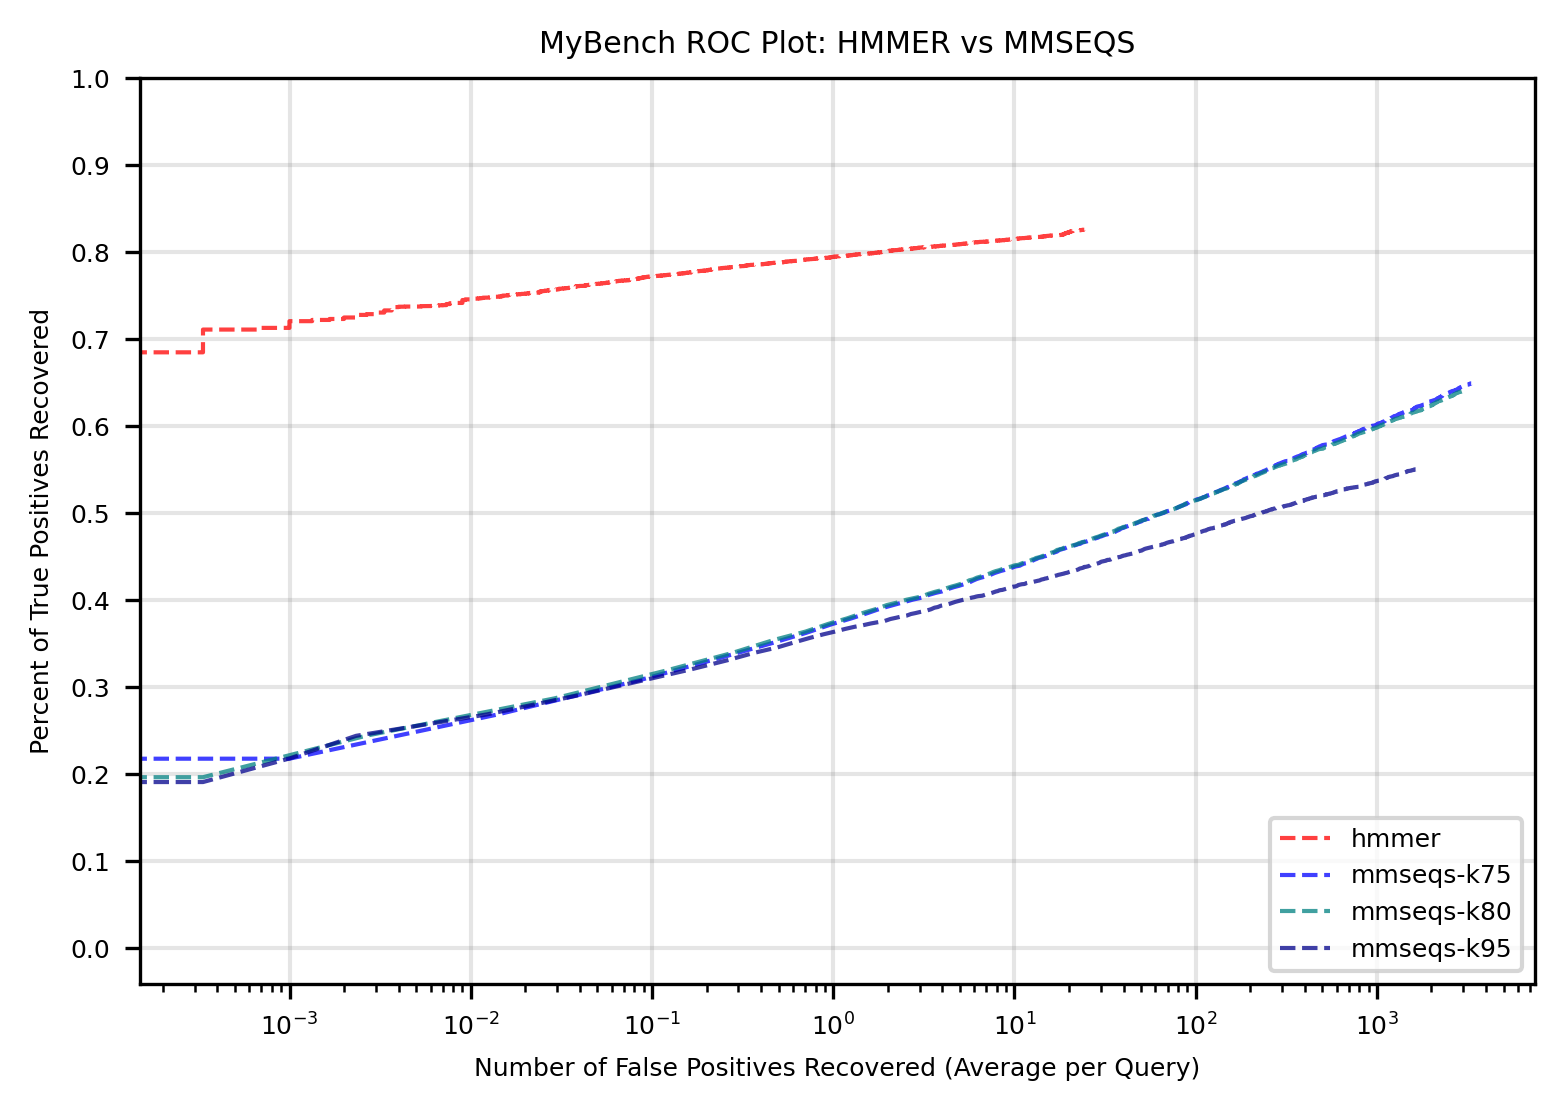

In [93]:
my_data = [  hmmer_data,  mmseqs_k75_data1, mmseqs_k80_data1, mmseqs_k95_data1 ]
my_colors  = [ 'red',  'blue', 'teal', 'darkblue', ]
my_labels  = [ 'hmmer', 'mmseqs-k75', 'mmseqs-k80', 'mmseqs-k95' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0 ]
my_linestyles = [ ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle="--", marker=None, linewidth=my_linewidths[x], alpha=0.75 )

yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)
    
plt.title('MyBench ROC Plot: HMMER vs MMSEQS')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

0
1
2
3
4
5


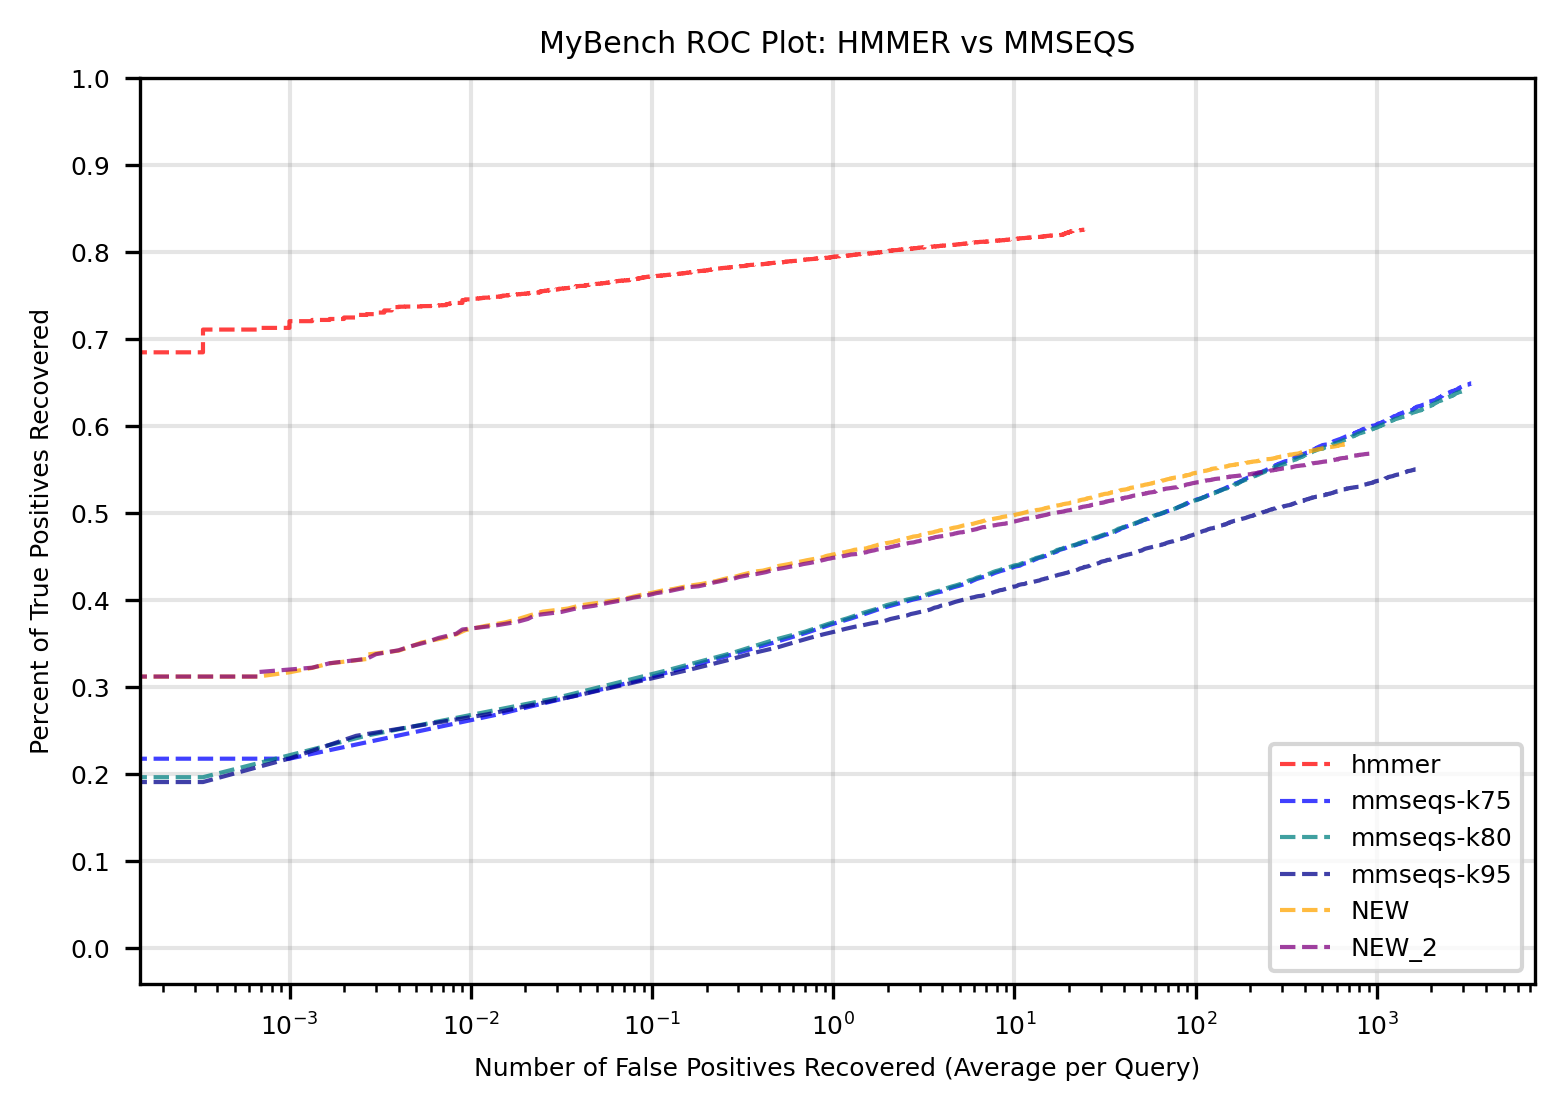

In [94]:
my_data = [  hmmer_data,  mmseqs_k75_data1, mmseqs_k80_data1, mmseqs_k95_data1, mmseqs_k80_data4, mmseqs_k80_data5 ]
my_colors  = [ 'red',  'blue', 'teal', 'darkblue', 'orange', 'purple' ]
my_labels  = [ 'hmmer', 'mmseqs-k75', 'mmseqs-k80', 'mmseqs-k95', 'NEW', 'NEW_2' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]
my_linestyles = [ ]

for x in range(len(my_data)):
    print(x)
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle="--", marker=None, linewidth=my_linewidths[x], alpha=0.75 )

yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)
    
plt.title('MyBench ROC Plot: HMMER vs MMSEQS')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

0
1
2
3
4


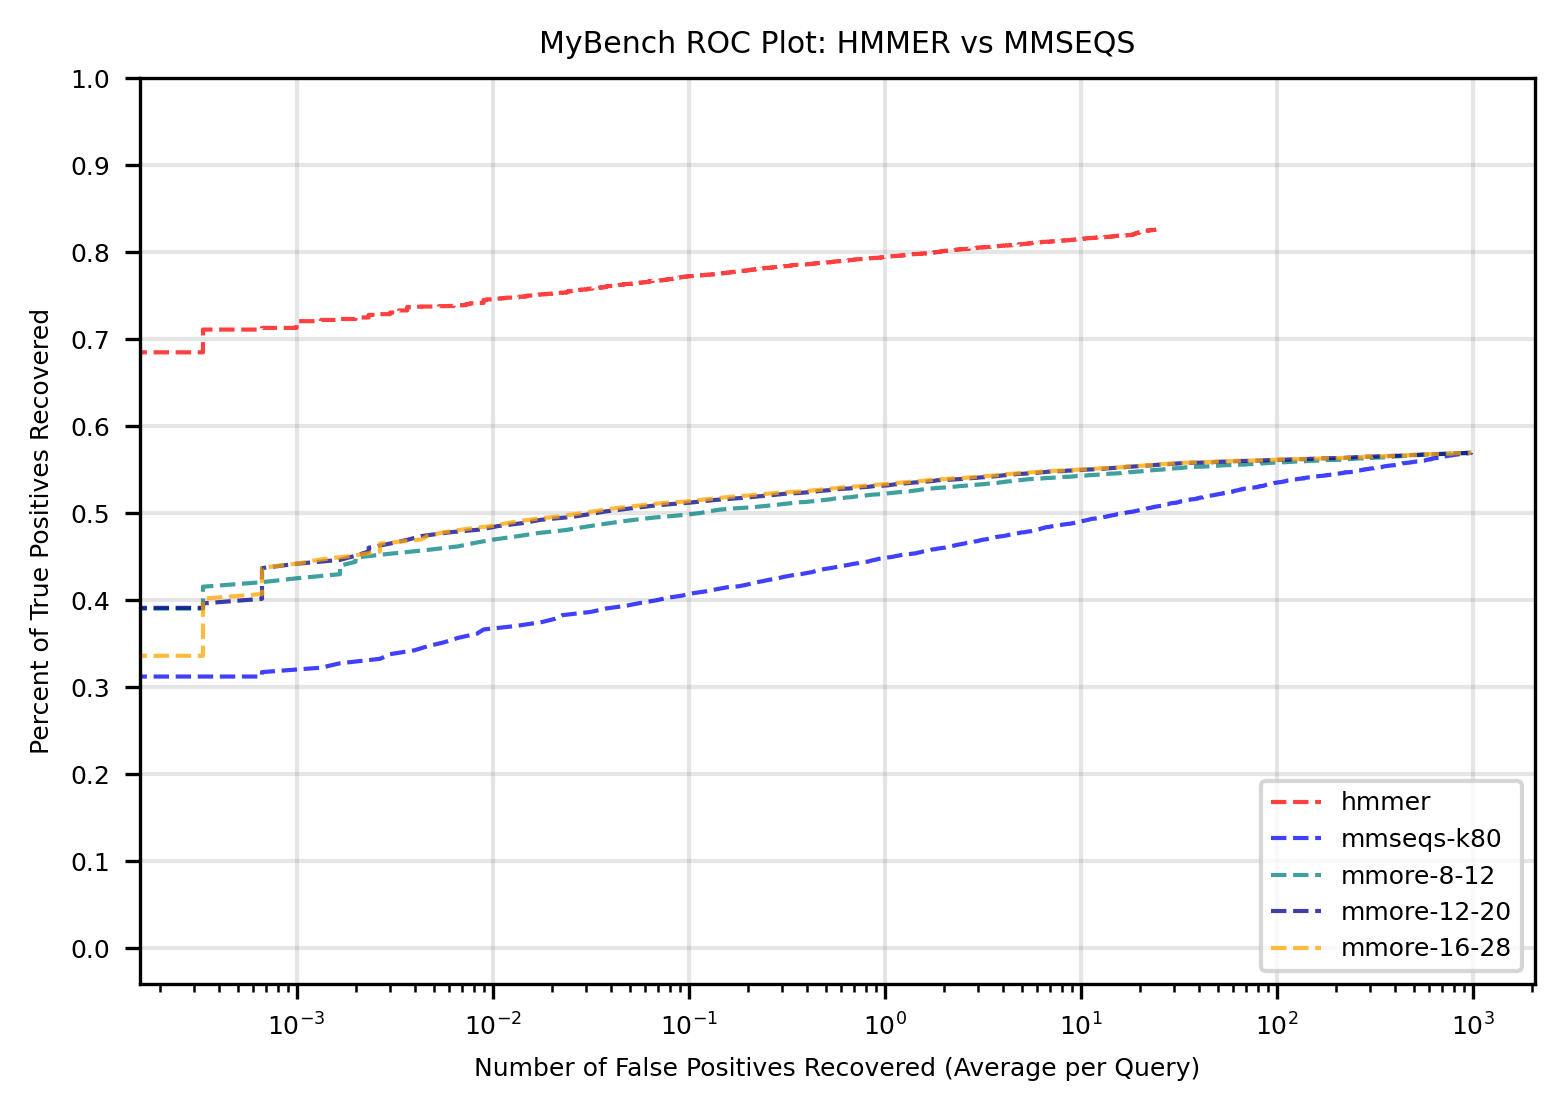

In [98]:
my_data = [  hmmer_data, mmseqs_k80_data5, mmore_a8_b12_data5, mmore_a12_b20_data5, mmore_a16_b28_data5 ]
my_colors  = [ 'red',  'blue', 'teal', 'darkblue', 'orange', 'purple' ]
my_labels  = [ 'hmmer', 'mmseqs-k80', 'mmore-8-12', 'mmore-12-20', 'mmore-16-28' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]
my_linestyles = [ ]

for x in range(len(my_data)):
    print(x)
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle="--", marker=None, linewidth=my_linewidths[x], alpha=0.75 )

yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)
    
plt.title('MyBench ROC Plot: HMMER vs MMSEQS')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

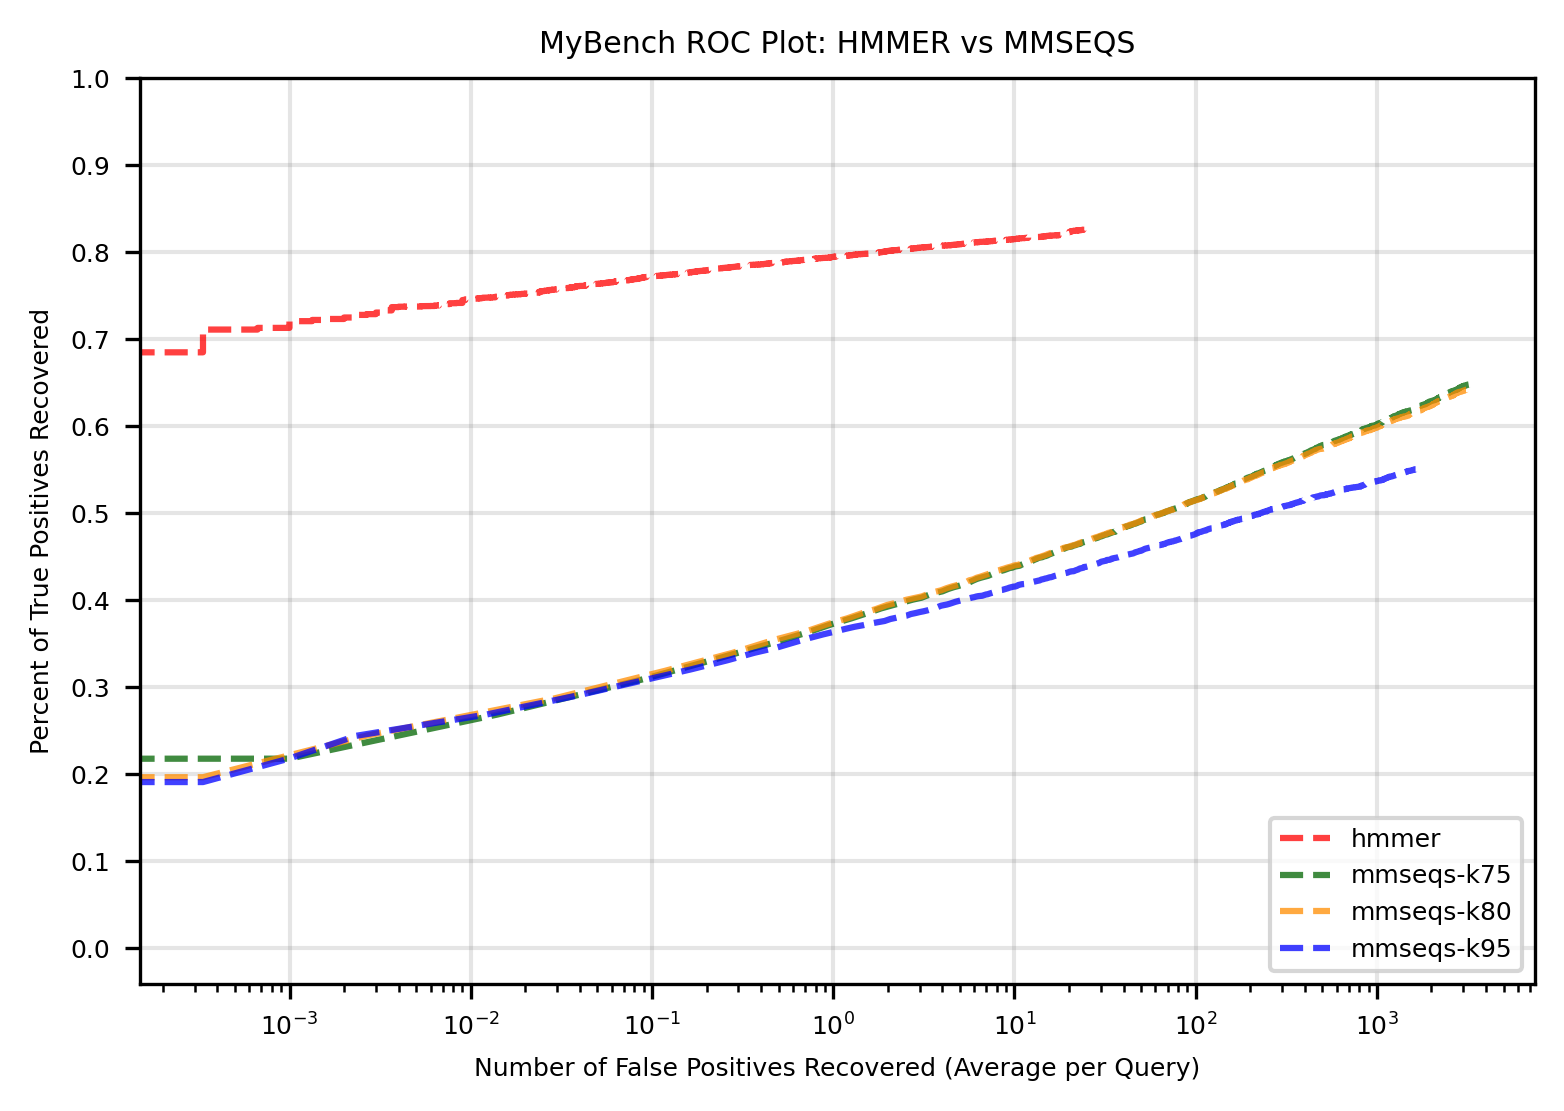

In [23]:
my_data = [  hmmer_data,  mmseqs_k75_data1, mmseqs_k80_data1, mmseqs_k95_data1 ]
my_colors  = [ 'red',  'darkgreen', 'darkorange', 'blue', ]
my_labels  = [ 'hmmer', 'mmseqs-k75', 'mmseqs-k80', 'mmseqs-k95' ]
my_linewidths = [ 1.5, 1.5, 1.5, 1.5 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle="--", marker=None, linewidth=my_linewidths[x], alpha=0.75 )

yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)
    
plt.title('MyBench ROC Plot: HMMER vs MMSEQS')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

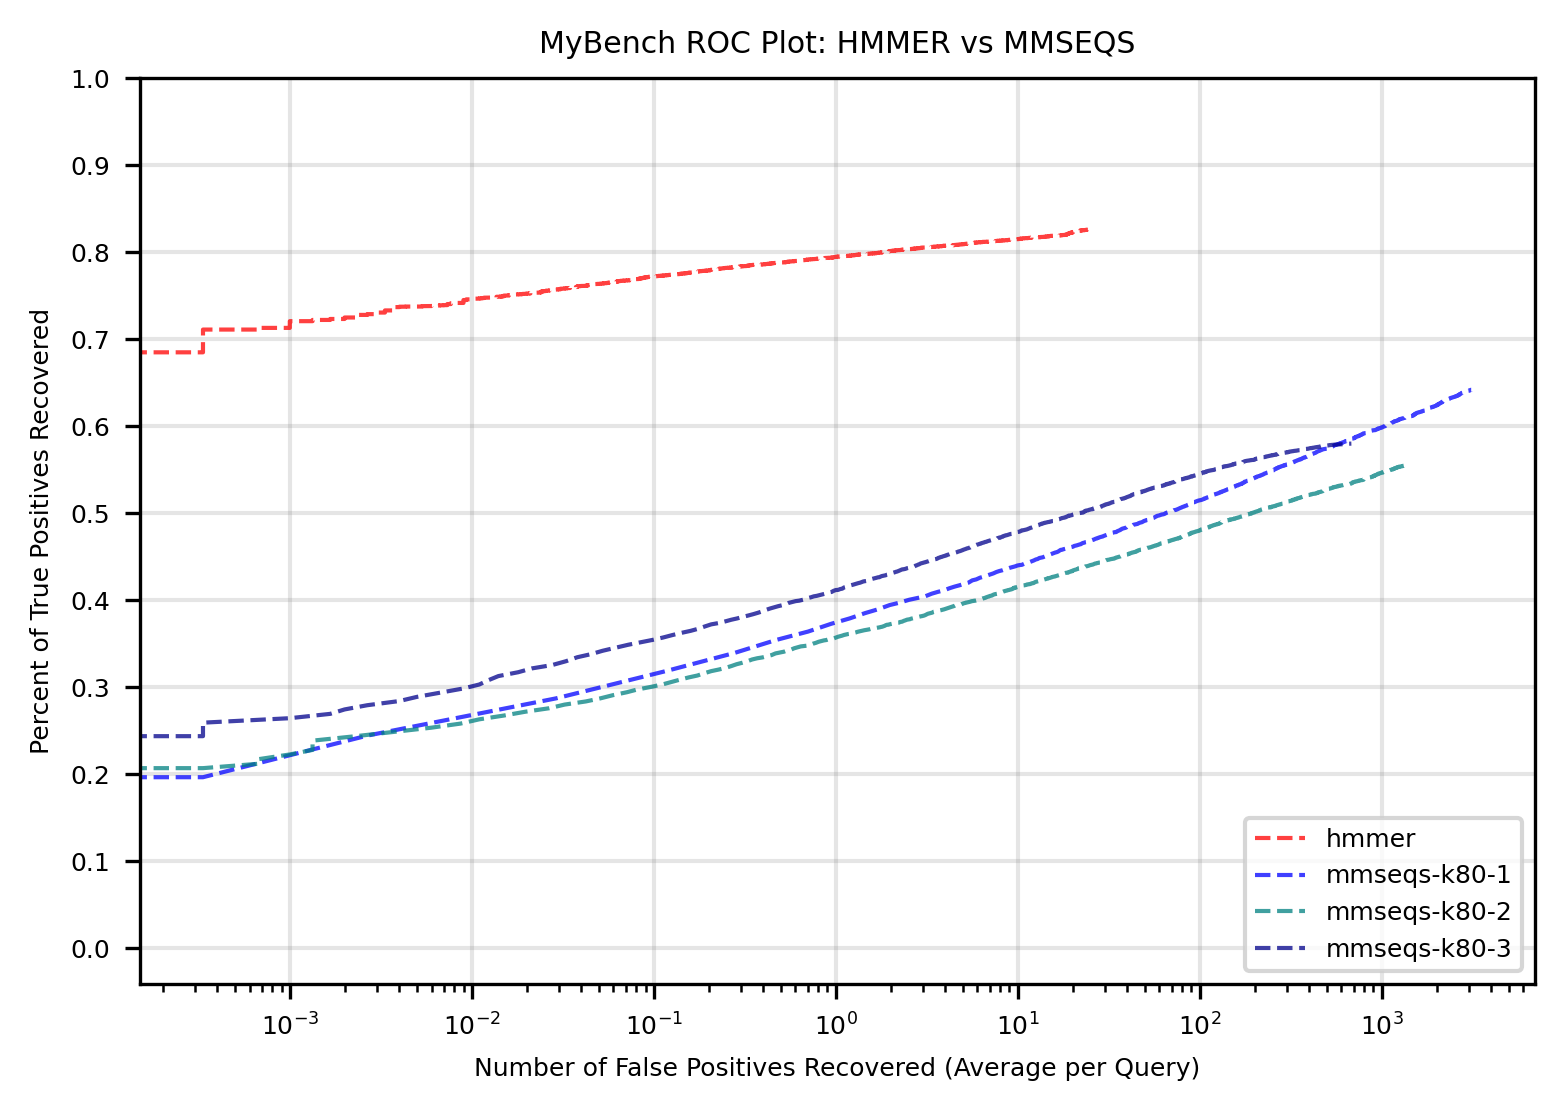

In [35]:
my_data = [  hmmer_data,  mmseqs_k80_data1, mmseqs_k80_data2, mmseqs_k80_data3 ]
my_colors  = [ 'red',  'blue', 'teal', 'darkblue' ]
my_labels  = [ 'hmmer', 'mmseqs-k80-1', 'mmseqs-k80-2', 'mmseqs-k80-3' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle="--", marker=None, linewidth=my_linewidths[x], alpha=0.75 )

yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)
    
plt.title('MyBench ROC Plot: HMMER vs MMSEQS')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

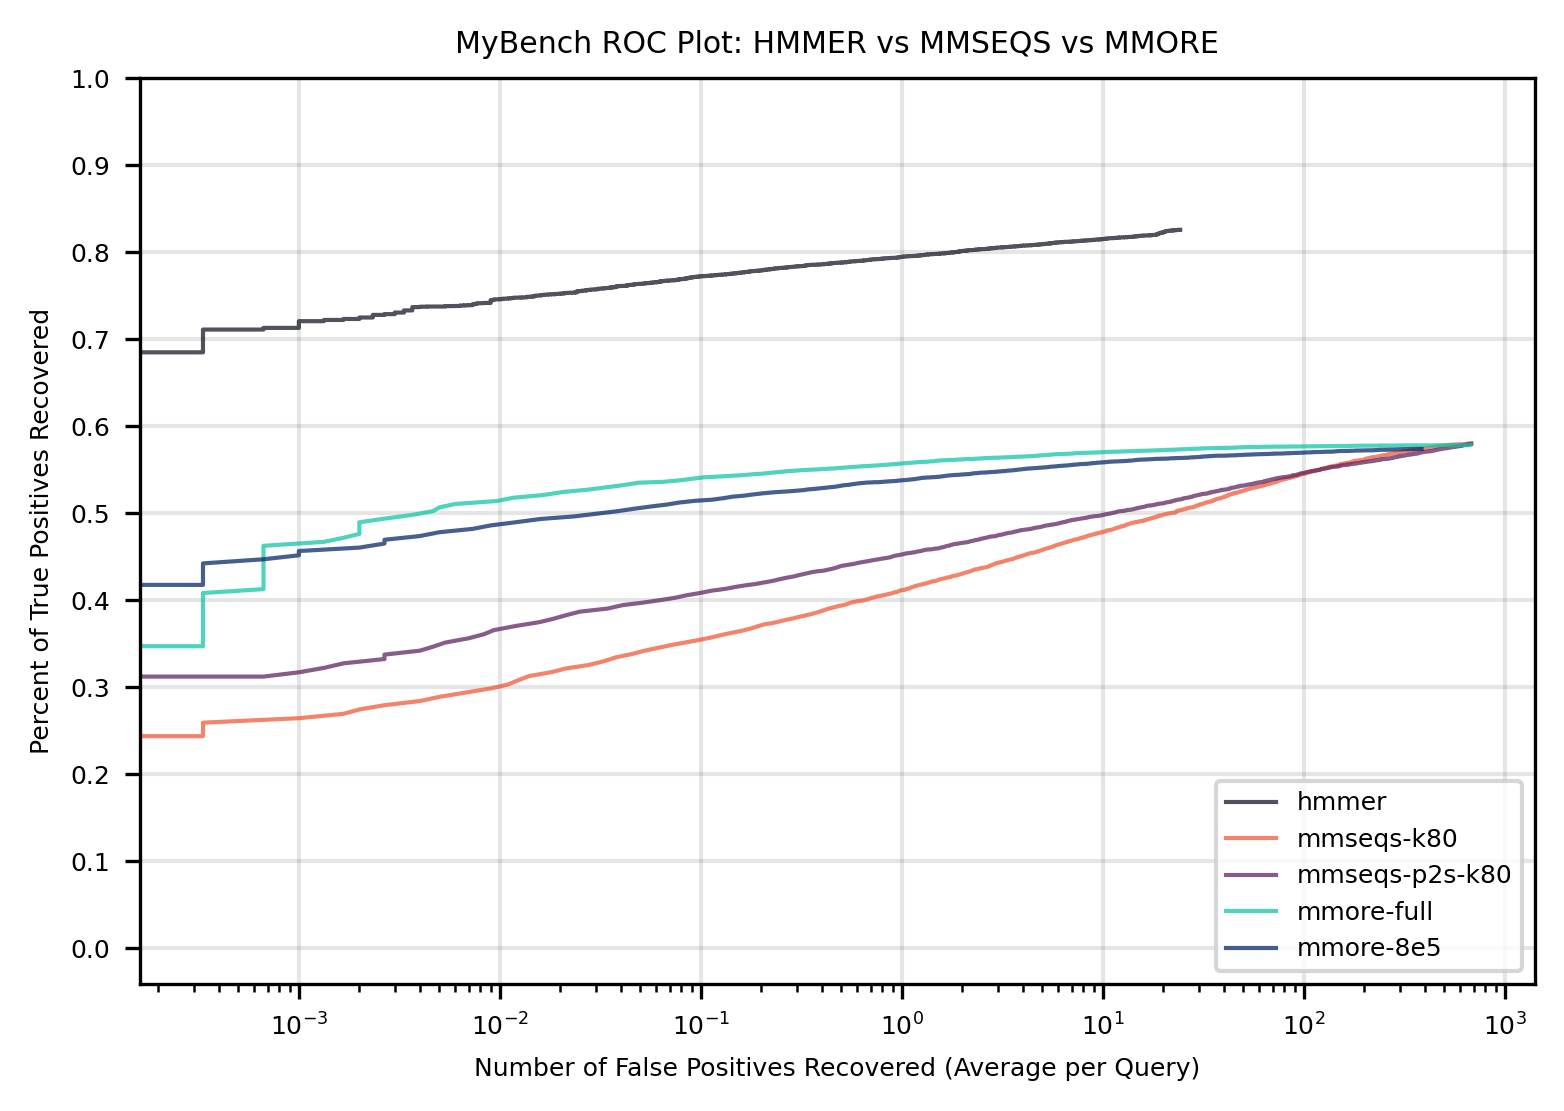

In [50]:
my_data = [  hmmer_data,  mmseqs_k80_data3, mmseqs_k80_data4, mmore_full_data, mmore_8e5_data ]
my_colors  = [ 'red',  'blue', 'orange', 'teal', 'darkgreen' ]
my_labels  = [ 'hmmer', 'mmseqs-k80', 'mmseqs-p2s-k80', 'mmore-full', 'mmore-8e5' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=safe_colors[x], label=my_labels[x], linestyle="-", marker=None, linewidth=my_linewidths[x], alpha=0.75 )

yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)
    
plt.title('MyBench ROC Plot: HMMER vs MMSEQS vs MMORE')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

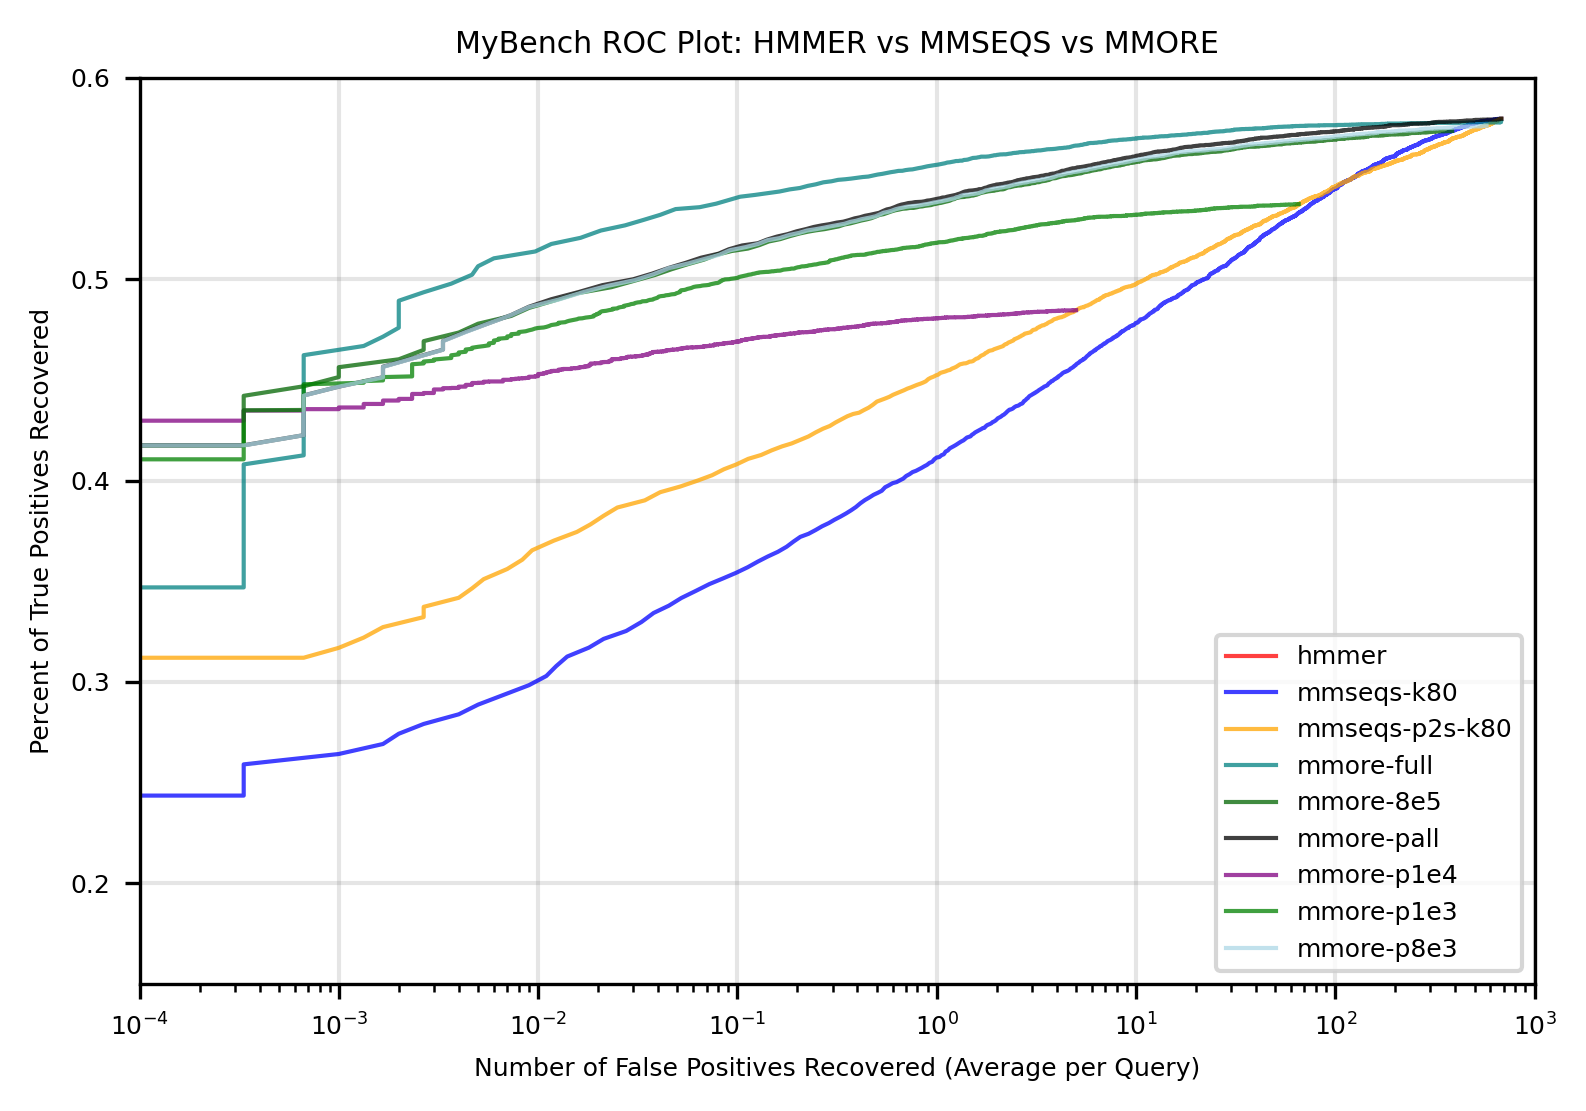

In [44]:
my_data = [  hmmer_data,  mmseqs_k80_data3, mmseqs_k80_data4, mmore_full_data, mmore_8e5_data, mmore_pall_data, mmore_p1e4_data, mmore_p1e3_data, mmore_p8e3_data ]
my_colors  = [ 'red',  'blue', 'orange', 'teal', 'darkgreen', 'black', 'purple', 'green', 'lightblue', 'black' ]
my_labels  = [ 'hmmer', 'mmseqs-k80', 'mmseqs-p2s-k80', 'mmore-full', 'mmore-8e5', 'mmore-pall', 'mmore-p1e4', 'mmore-p1e3', 'mmore-p8e3', 'mmore-NEW' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle="-", marker=None, linewidth=my_linewidths[x], alpha=0.75 )

yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)

plt.ylim(0.15, 0.6)
plt.xlim(10e-5, 10e2)
    
plt.title('MyBench ROC Plot: HMMER vs MMSEQS vs MMORE')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

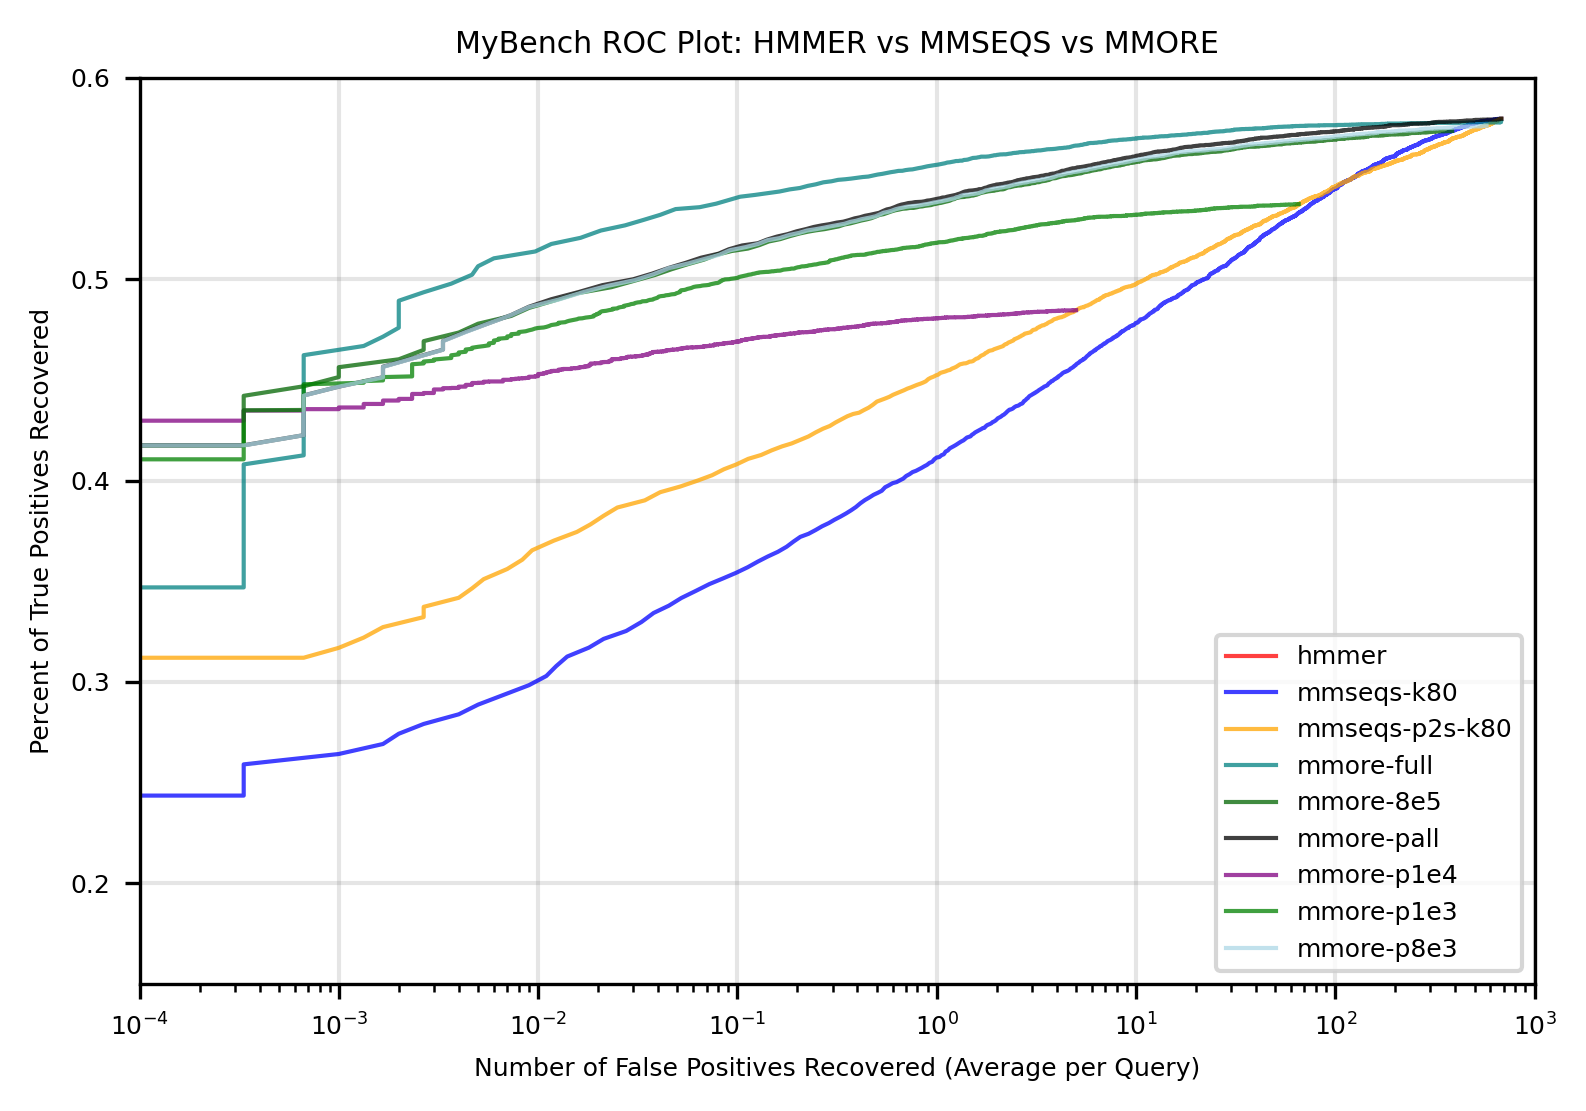

In [44]:
my_data = [  hmmer_data,  mmseqs_k80_data3, mmseqs_k80_data4, mmore_full_data, mmore_8e5_data, mmore_pall_data, mmore_p1e4_data, mmore_p1e3_data, mmore_p8e3_data  ]
my_colors  = [ 'red',  'blue', 'orange', 'teal', 'darkgreen', 'black', 'purple', 'green', 'lightblue' ]
my_labels  = [ 'hmmer', 'MMSEQS-S2S (k80)', 'MMSEQS-P2S (k80)', 'mmore-full', 'mmore-8e5', 'mmore-pall', 'mmore-p1e4', 'mmore-p1e3', 'mmore-p8e3' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="-", marker=None, linewidth=linewidths[x], alpha=0.75 )

yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)

plt.ylim(0.15, 0.6)
plt.xlim(10e-5, 10e2)
    
plt.title('MyBench ROC Plot: HMMER vs MMSEQS vs MMORE')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

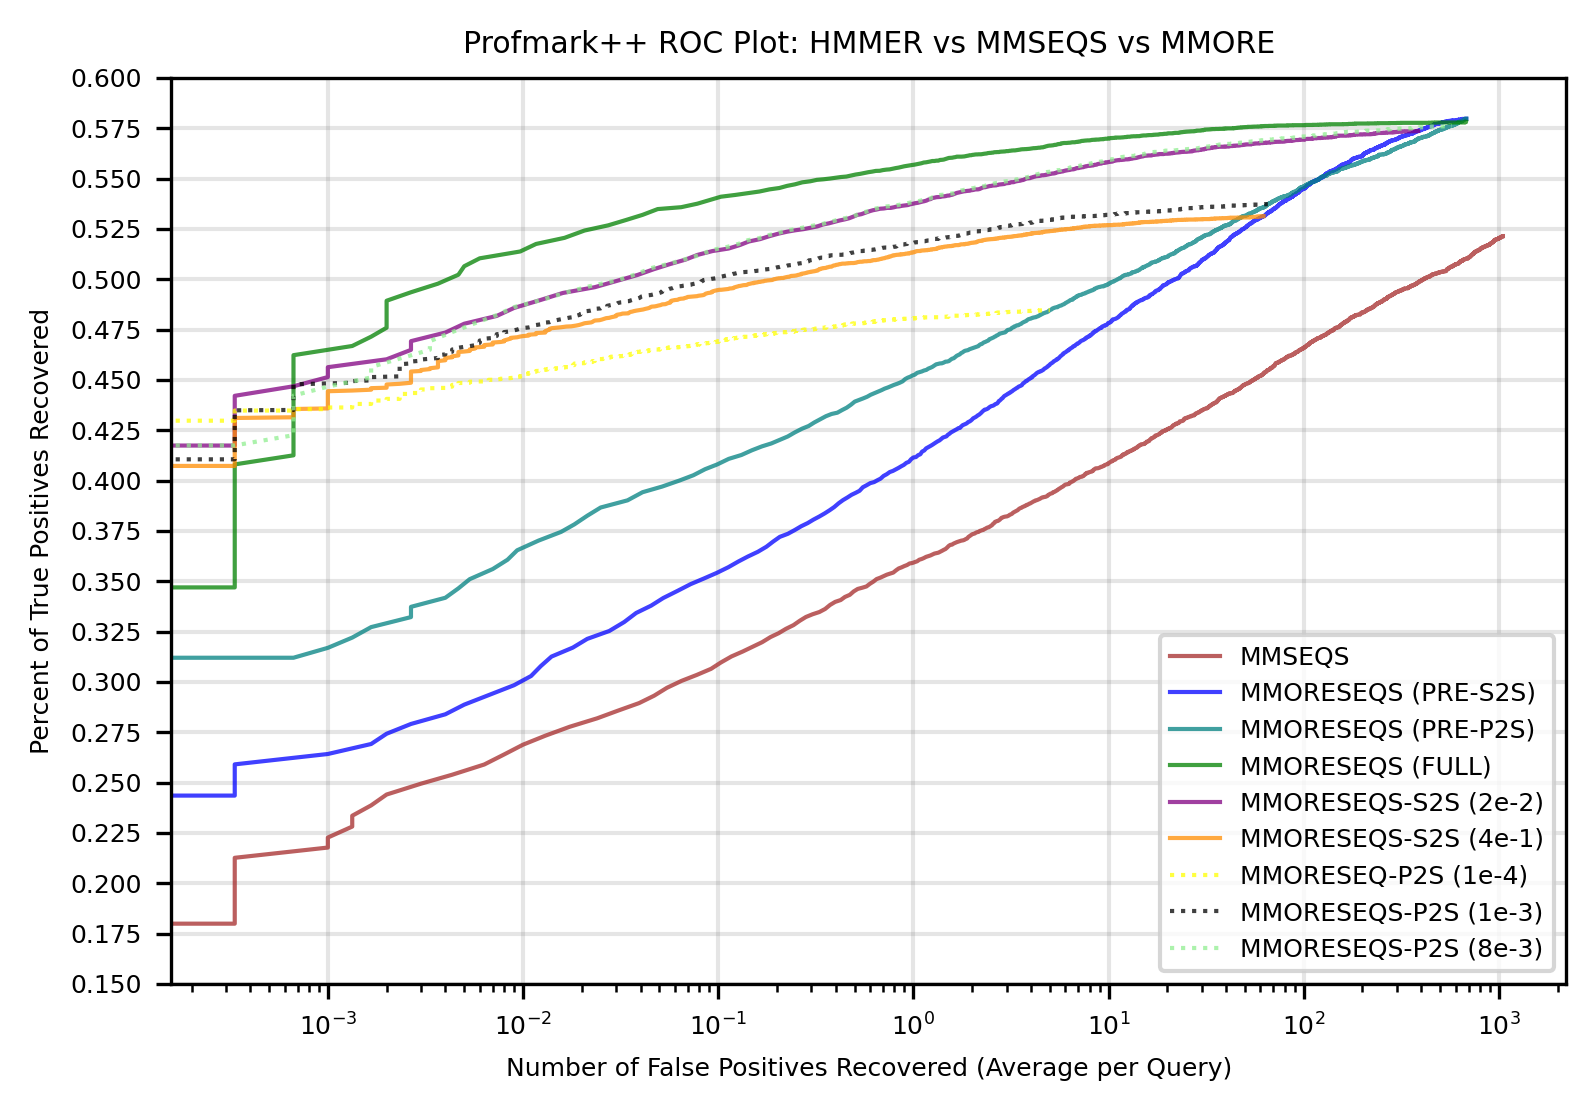

In [24]:
my_data = [  hmmer_data, mmseqs_k95_data2, mmseqs_k80_data3, mmseqs_k80_data4, mmore_full_data, mmore_8e5_data, mmore_2e4_data, mmore_p1e4_data, mmore_p1e3_data, mmore_p8e3_data ]
my_colors  = [ 'red', 'brown', 'blue', 'teal', 'green', 'purple', 'darkorange', 'yellow', 'black', 'lightgreen' ]
my_labels  = [ 'HMMER', 'MMSEQS', 'MMORESEQS (PRE-S2S)', 'MMORESEQS (PRE-P2S)', 'MMORESEQS (FULL)', 'MMORESEQS-S2S (2e-2)', 'MMORESEQS-S2S (4e-1)', 'MMORESEQ-P2S (1e-4)', 'MMORESEQS-P2S (1e-3)', 'MMORESEQS-P2S (8e-3)' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]
my_linestyles = [ '-', '-', '-', '-', '-', '-', '-', ':', ':', ':' ]

for x in range(1,len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle=linestyles[x], marker=None, linewidth=linewidths[x], alpha=0.75 )

yticks = [(x*0.025) for x in range(0,41,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)

plt.ylim(0.15, 0.6)
    
plt.title('Profmark++ ROC Plot: HMMER vs MMSEQS vs MMORE')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

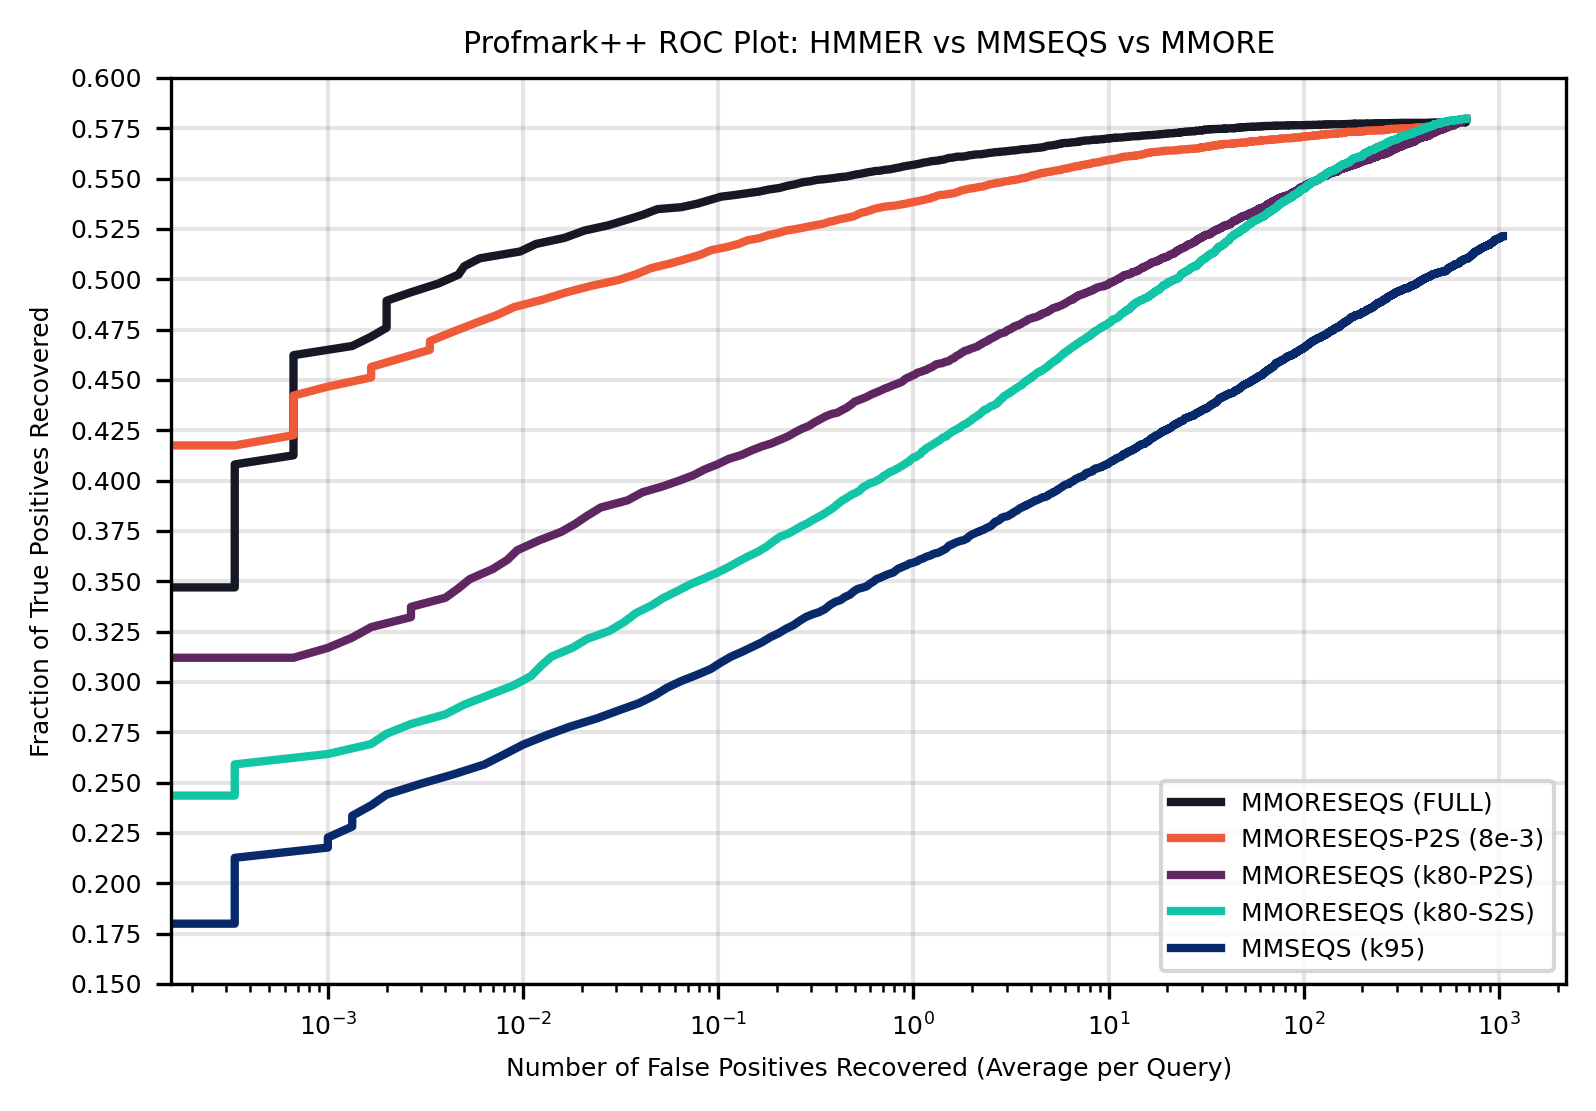

In [33]:
my_data = [  hmmer_data, mmseqs_k95_data2, mmseqs_k80_data3, mmseqs_k80_data4, mmore_full_data, mmore_8e5_data, mmore_2e4_data, mmore_p1e4_data, mmore_p1e3_data, mmore_p8e3_data ]
my_colors  = [ 'red', 'brown', 'blue', 'teal', 'green', 'purple', 'darkorange', 'yellow', 'black', 'lightgreen' ]
my_labels  = [ 'HMMER', 'MMSEQS (k95)', 'MMORESEQS (k80-S2S)', 'MMORESEQS (k80-P2S)', 'MMORESEQS (FULL)', 'MMORESEQS-S2S (2e-2)', 'MMORESEQS-S2S (4e-1)', 'MMORESEQ-P2S (1e-4)', 'MMORESEQS-P2S (1e-3)', 'MMORESEQS-P2S (8e-3)' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]
my_linestyles = [ '-', '-', '-', '-', '-', '-', '-', ':', ':', ':' ]

ordering = [4, 9, 3, 2, 1]
for i, x in enumerate(ordering):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=safe_colors[i], label=labels[x], linestyle='-', marker=None, linewidth=2.0, alpha=1.0 )

yticks = [(x*0.025) for x in range(0,41,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)

plt.ylim(0.15, 0.6)
    
plt.title('Profmark++ ROC Plot: HMMER vs MMSEQS vs MMORE')
plt.legend(loc='lower right')
plt.ylabel('Fraction of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

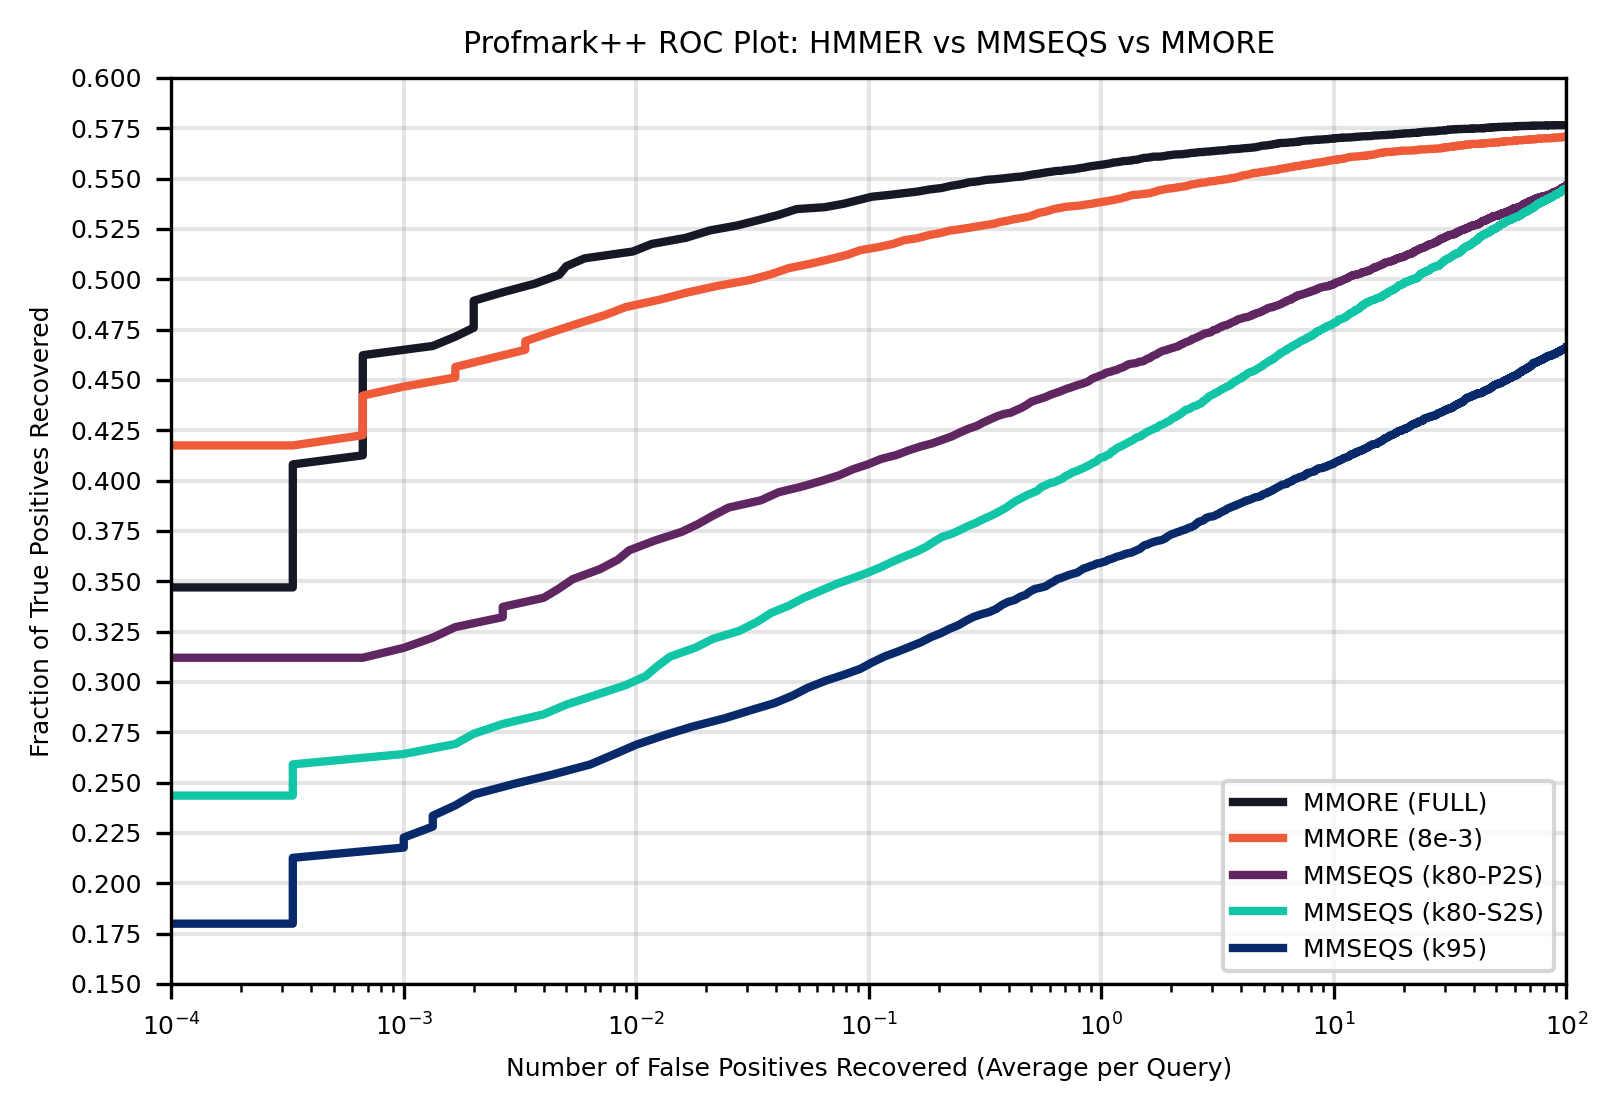

In [35]:
my_data = [  hmmer_data, mmseqs_k95_data2, mmseqs_k80_data3, mmseqs_k80_data4, mmore_full_data, mmore_8e5_data, mmore_2e4_data, mmore_p1e4_data, mmore_p1e3_data, mmore_p8e3_data ]
my_colors  = [ 'red', 'brown', 'blue', 'teal', 'green', 'purple', 'darkorange', 'yellow', 'black', 'lightgreen' ]
my_labels  = [ 'HMMER', 'MMSEQS (k95)', 'MMSEQS (k80-S2S)', 'MMSEQS (k80-P2S)', 'MMORE (FULL)', 'MMORE-S2S (2e-2)', 'MMORE-S2S (4e-1)', 'MMORE (1e-4)', 'MMORE (1e-3)', 'MMORE (8e-3)' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]
my_linestyles = [ '-', '-', '-', '-', '-', '-', '-', ':', ':', ':' ]

ordering = [4, 9, 3, 2, 1]
for i, x in enumerate(ordering):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=safe_colors[i], label=labels[x], linestyle='-', marker=None, linewidth=2.0, alpha=1.0 )

yticks = [(x*0.025) for x in range(0,41,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)

plt.ylim(0.15, 0.6)
plt.xlim(1e-4, 1e2)
    
plt.title('Profmark++ ROC Plot: HMMER vs MMSEQS vs MMORE')
plt.legend(loc='lower right')
plt.ylabel('Fraction of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

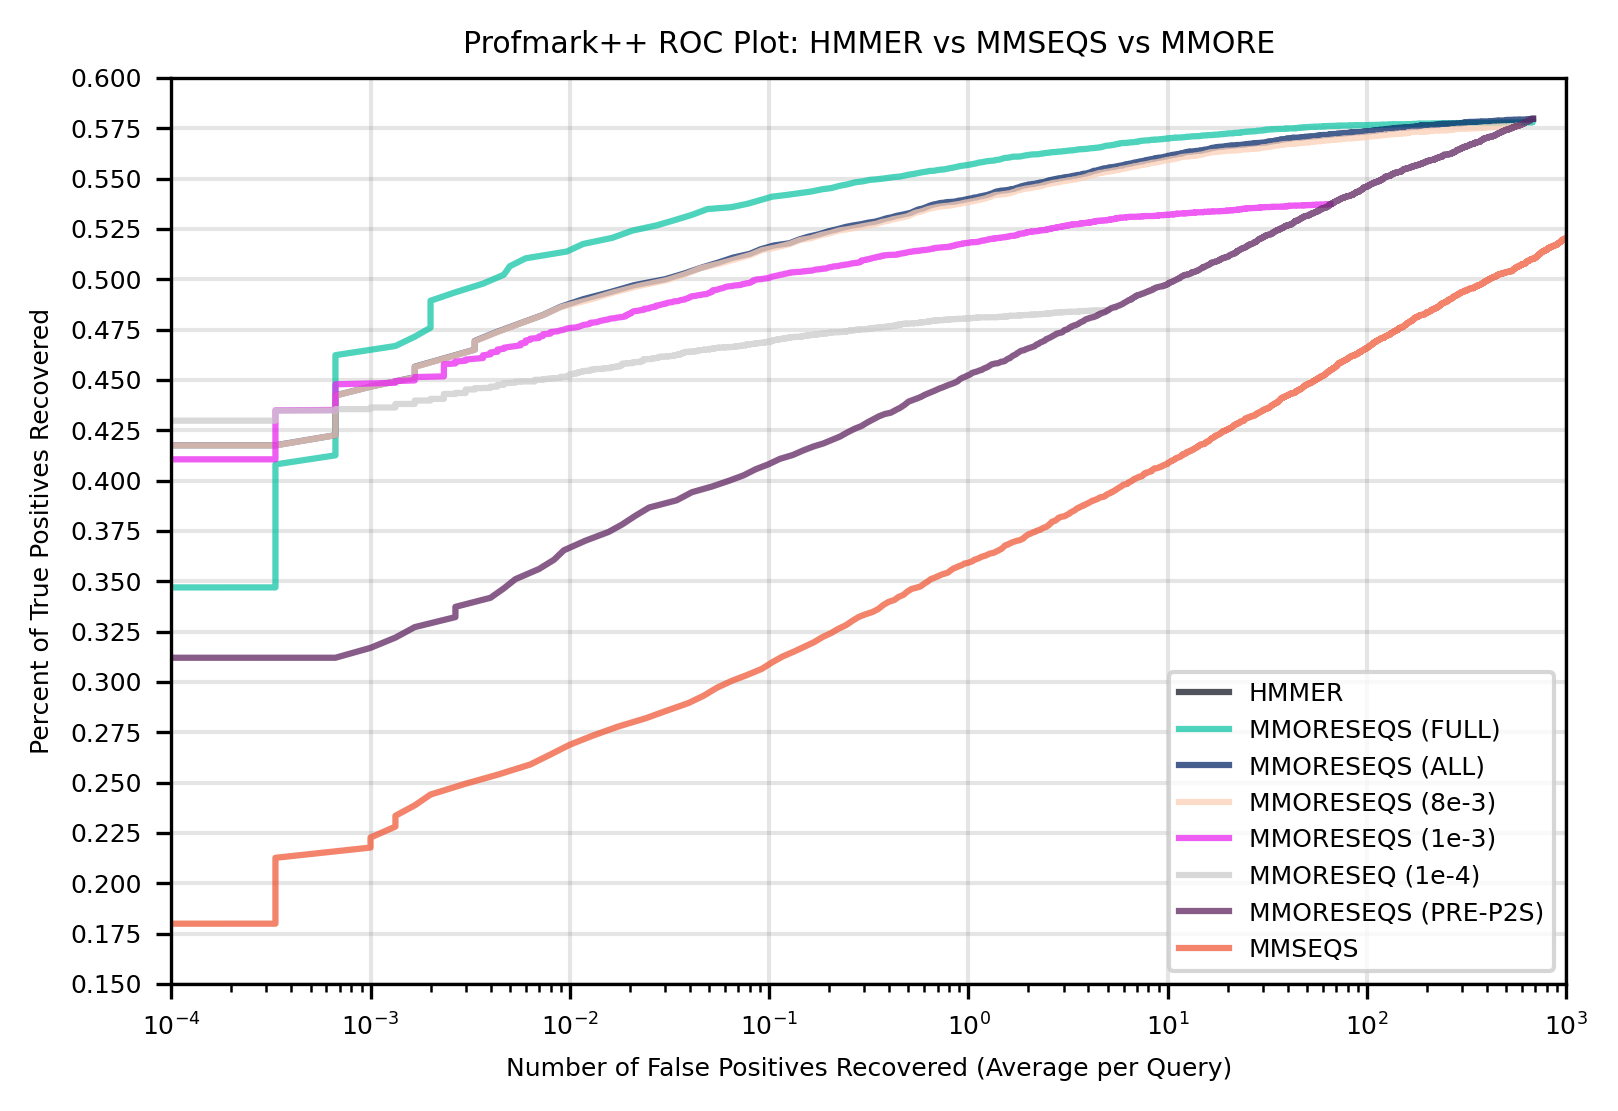

In [59]:
my_data = [  hmmer_data, mmseqs_k95_data2, mmseqs_k80_data4, mmore_full_data, mmore_pall_data, mmore_p1e4_data, mmore_p1e3_data, mmore_p8e3_data ]
my_colors  = [ '#F9C754', 'brown', 'blue', 'teal', 'green', 'purple', 'darkorange', 'yellow', 'black', 'lightgreen' ]
my_labels  = [ 'HMMER', 'MMSEQS', 'MMORESEQS (PRE-P2S)', 'MMORESEQS (FULL)', 'MMORESEQS (ALL)', 'MMORESEQ (1e-4)', 'MMORESEQS (1e-3)', 'MMORESEQS (8e-3)' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]
my_linestyles = [ '-', '-', '-', '-', '-', '-', '-', '-', '-', '-']

ordering = [0, 3, 4, 7, 6, 5, 2, 1 ]

for x in ordering:
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=safe_colors[x], label=labels[x], linestyle=linestyles[x], marker=None, linewidth=1.5, alpha=0.75 )

yticks = [(x*0.025) for x in range(0,41,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)

plt.ylim(0.15, 0.6)
plt.xlim(10e-5, 10e2)
    
plt.title('Profmark++ ROC Plot: HMMER vs MMSEQS vs MMORE')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

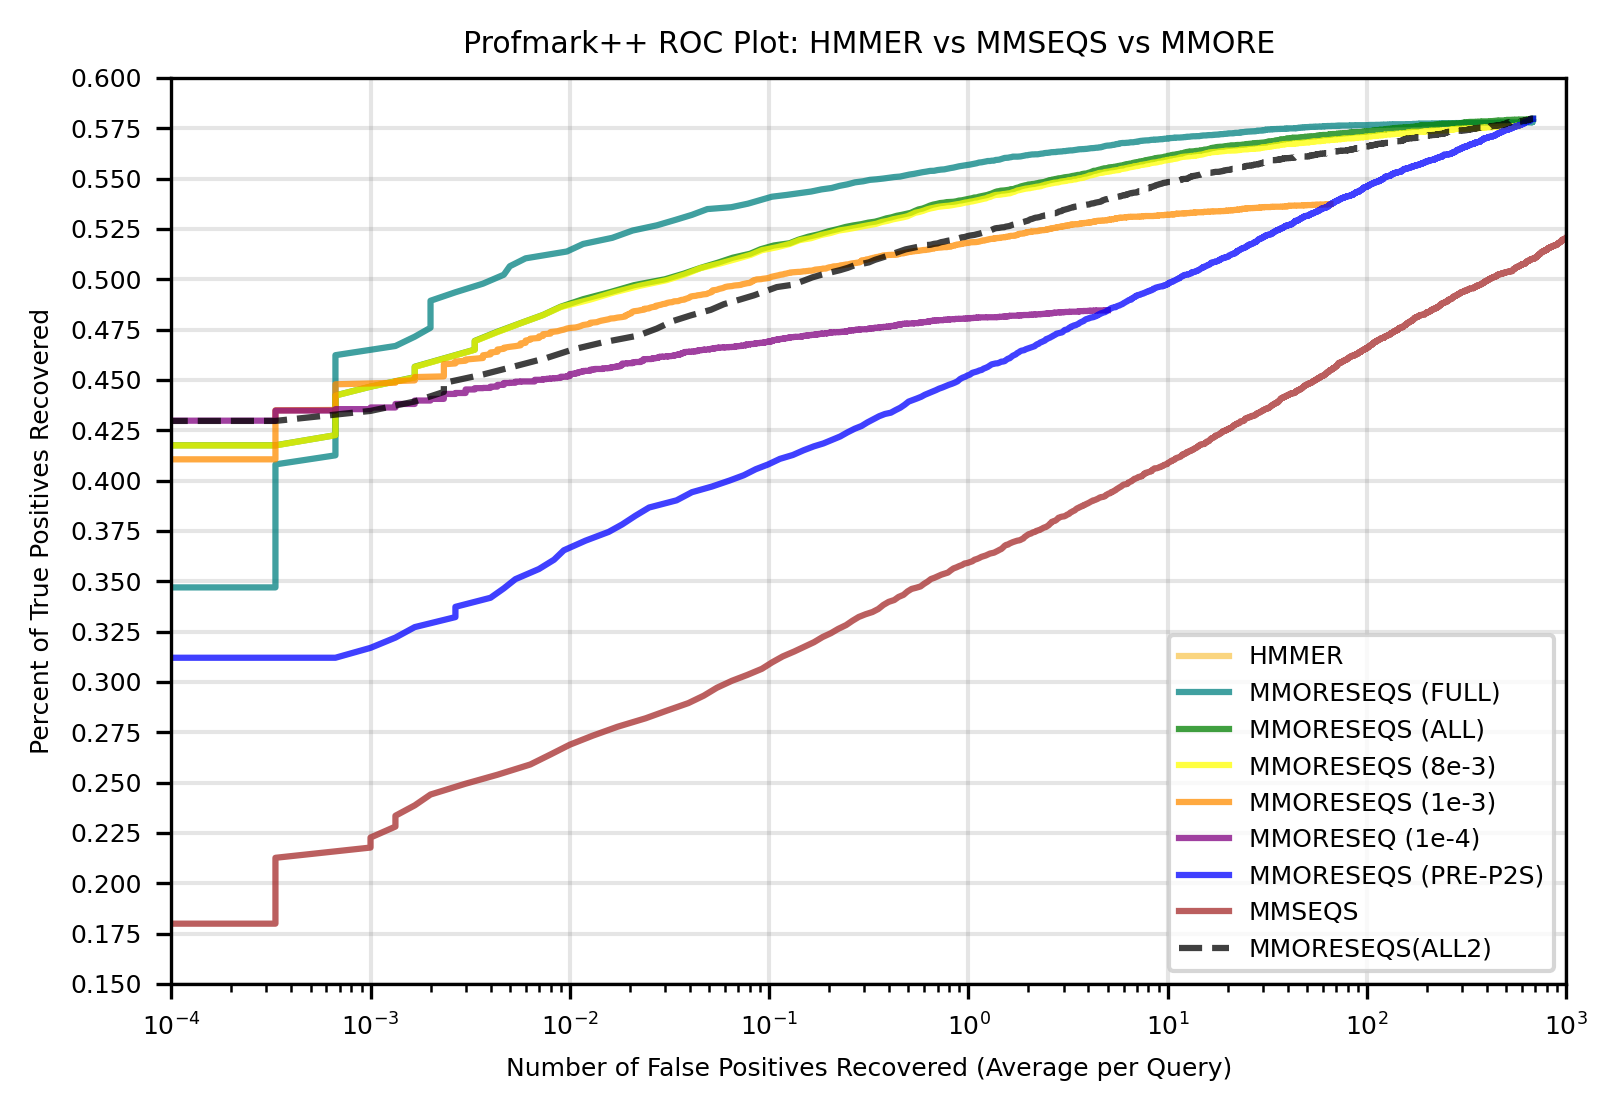

In [42]:
my_data = [  hmmer_data, mmseqs_k95_data2, mmseqs_k80_data4, mmore_full_data, mmore_pall_data, mmore_p1e4_data, mmore_p1e3_data, mmore_p8e3_data, mmore_pall_data2 ]
my_colors  = [ '#F9C754', 'brown', 'blue', 'teal', 'green', 'purple', 'darkorange', 'yellow', 'black', 'lightgreen', 'black' ]
my_labels  = [ 'HMMER', 'MMSEQS', 'MMORESEQS (PRE-P2S)', 'MMORESEQS (FULL)', 'MMORESEQS (ALL)', 'MMORESEQ (1e-4)', 'MMORESEQS (1e-3)', 'MMORESEQS (8e-3)', 'MMORESEQS(ALL2)' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]
my_linestyles = [ '-', '-', '-', '-', '-', '-', '-', '-', '--', '-', '--']

ordering = [0, 3, 4, 7, 6, 5, 2, 1, 8 ]

for x in ordering:
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle=my_linestyles[x], marker=None, linewidth=1.5, alpha=0.75 )

yticks = [(x*0.025) for x in range(0,41,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)

plt.ylim(0.15, 0.6)
plt.xlim(10e-5, 10e2)
    
plt.title('Profmark++ ROC Plot: HMMER vs MMSEQS vs MMORE')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

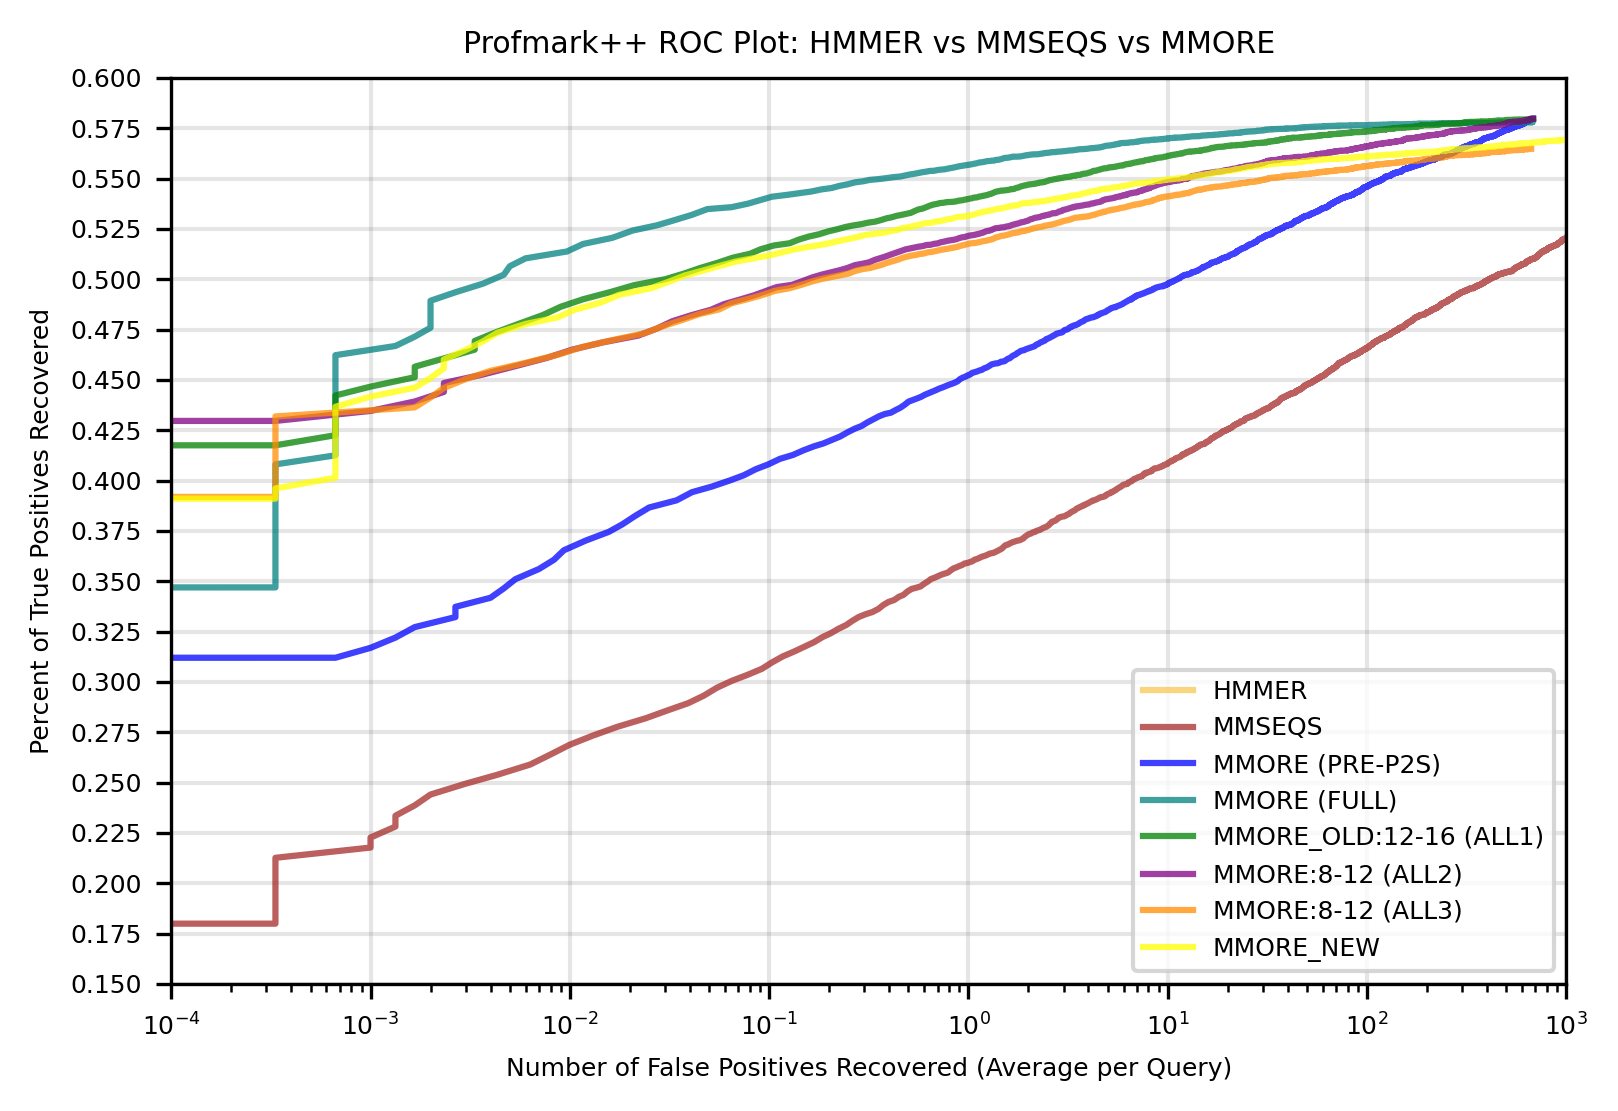

In [102]:
my_data = [  hmmer_data, mmseqs_k95_data2, mmseqs_k80_data4, mmore_full_data, mmore_pall_data, mmore_pall_data2, mmore_pall_data3, mmore_a12_b20_data5 ]
my_colors  = [ '#F9C754', 'brown', 'blue', 'teal', 'green', 'purple', 'darkorange', 'yellow', 'black', 'lightgreen', 'black', 'pink' ]
my_labels  = [ 'HMMER', 'MMSEQS', 'MMORE (PRE-P2S)', 'MMORE (FULL)', 'MMORE_OLD:12-16 (ALL1)','MMORE:8-12 (ALL2)', 'MMORE:8-12 (ALL3)', 'MMORE_NEW' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]
my_linestyles = [ '-', '-', '-', '-', '-', '-', '-', '-', '--', '-', '--', '--']

# ordering = [0, 3, 4, 7, 6, 5, 2, 1, 8 ]
ordering = [x for x in range(len(my_data))]

for x in ordering:
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle=my_linestyles[x], marker=None, linewidth=1.5, alpha=0.75 )

yticks = [(x*0.025) for x in range(0,41,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)

plt.ylim(0.15, 0.6)
plt.xlim(10e-5, 10e2)
    
plt.title('Profmark++ ROC Plot: HMMER vs MMSEQS vs MMORE')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

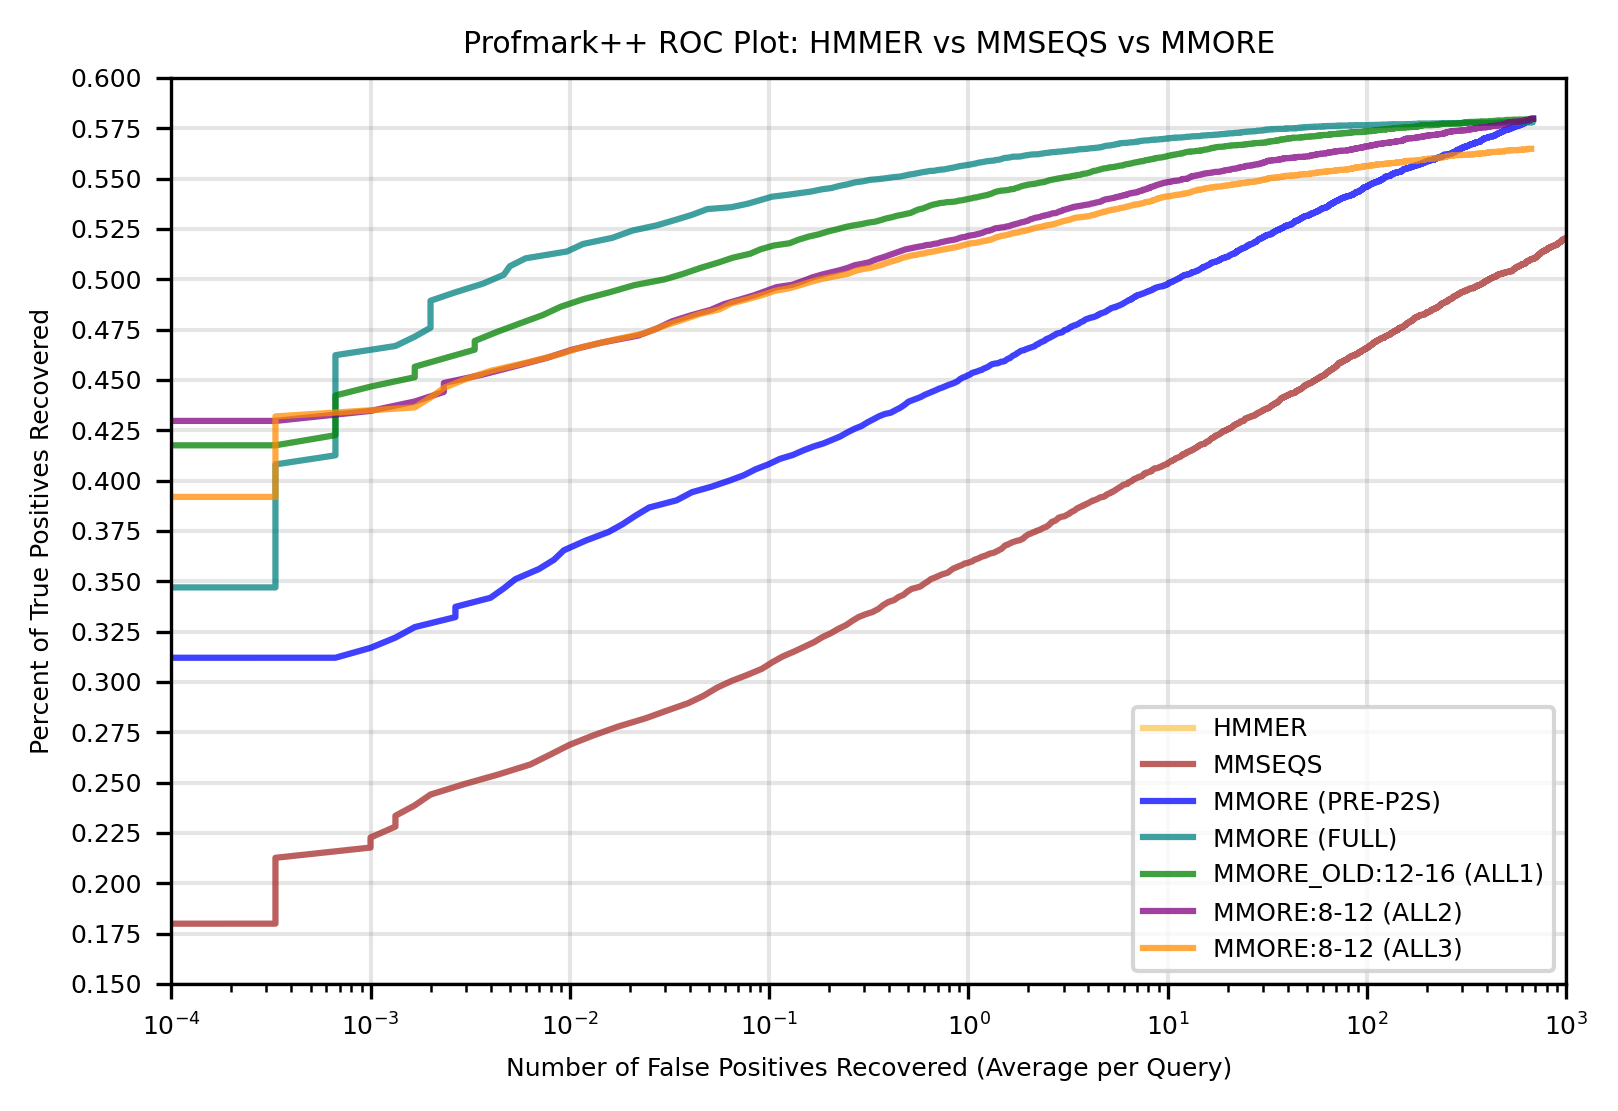

In [82]:
my_data = [  hmmer_data, mmseqs_k95_data2, mmseqs_k80_data4, mmore_full_data, mmore_pall_data, mmore_pall_data2, mmore_pall_data3 ]
my_colors  = [ '#F9C754', 'brown', 'blue', 'teal', 'green', 'purple', 'darkorange', 'yellow', 'black', 'lightgreen', 'black' ]
my_labels  = [ 'HMMER', 'MMSEQS', 'MMORE (PRE-P2S)', 'MMORE (FULL)', 'MMORE_OLD:12-16 (ALL1)','MMORE:8-12 (ALL2)', 'MMORE:8-12 (ALL3)' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]
my_linestyles = [ '-', '-', '-', '-', '-', '-', '-', '-', '--', '-', '--']

# ordering = [0, 3, 4, 7, 6, 5, 2, 1, 8 ]
ordering = [x for x in range(len(my_data))]

for x in ordering:
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle=my_linestyles[x], marker=None, linewidth=1.5, alpha=0.75 )

yticks = [(x*0.025) for x in range(0,41,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)

plt.ylim(0.15, 0.6)
plt.xlim(10e-5, 10e2)
    
plt.title('Profmark++ ROC Plot: HMMER vs MMSEQS vs MMORE')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

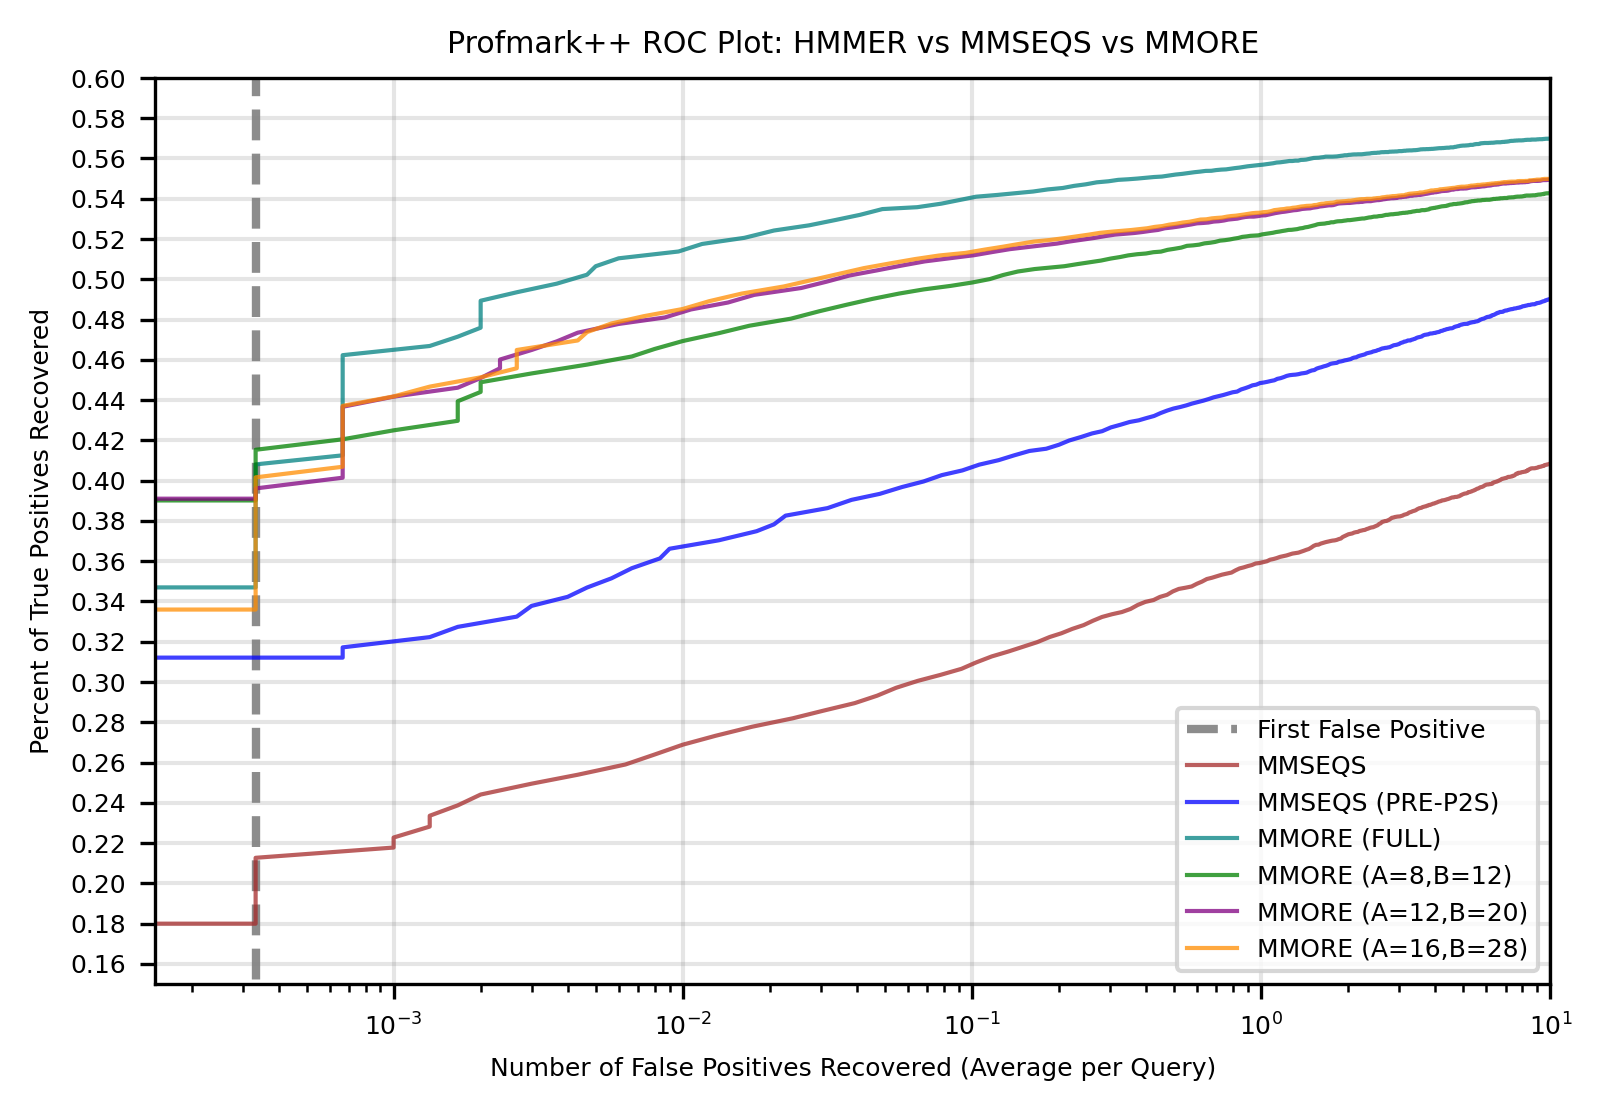

In [122]:
my_data = [  hmmer_data, mmseqs_k95_data2, mmseqs_k80_data5, mmore_full_data, mmore_a8_b12_data5, mmore_a12_b20_data5, mmore_a16_b28_data5 ]
my_colors  = [ 'red', 'brown', 'blue', 'teal', 'green', 'purple', 'darkorange', 'pink' ]
my_labels  = [ 'HMMER', 'MMSEQS', 'MMSEQS (PRE-P2S)', 'MMORE (FULL)', 'MMORE (A=8,B=12)', 'MMORE (A=12,B=20)', 'MMORE (A=16,B=28)' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]
my_linestyles = [ '-', '-', '-', '-', '-', '-', '-' ]

# first false positive
plt.plot( [1/total_query,1/total_query], [-1,2], color='gray', linewidth='2.0', linestyle='--', alpha=0.9, label='First False Positive' )
# # .01% false discovery rate (fp/tp = 0.01 => fp = tp * 0.01)
# y = np.linspace(0,1,51)
# plt.plot( y * 0.01, y, color='gray', linewidth='2.0', linestyle='--', alpha=0.6, label='1% False Discovery Rate (Average)')
# # 1% false discovery rate (fp/tp = 0.05 => fp = tp * 0.05)
# y = np.linspace(0,1,51)
# plt.plot( y * 0.05, y, color='gray', linewidth='2.0', linestyle='--', alpha=0.4, label='5% False Discovery Rate (Average)')

# plot data
ordering = [0,]
for x in range(1,len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=my_colors[x], label=my_labels[x], linestyle=my_linestyles[x], marker=None, linewidth=my_linewidths[x], alpha=0.75 )

# gridlines
yticks = np.linspace(0,1,51)
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)

# window
plt.ylim(0.15, 0.6)
plt.xlim(15e-5, 10e0)
    
plt.title('Profmark++ ROC Plot: HMMER vs MMSEQS vs MMORE')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

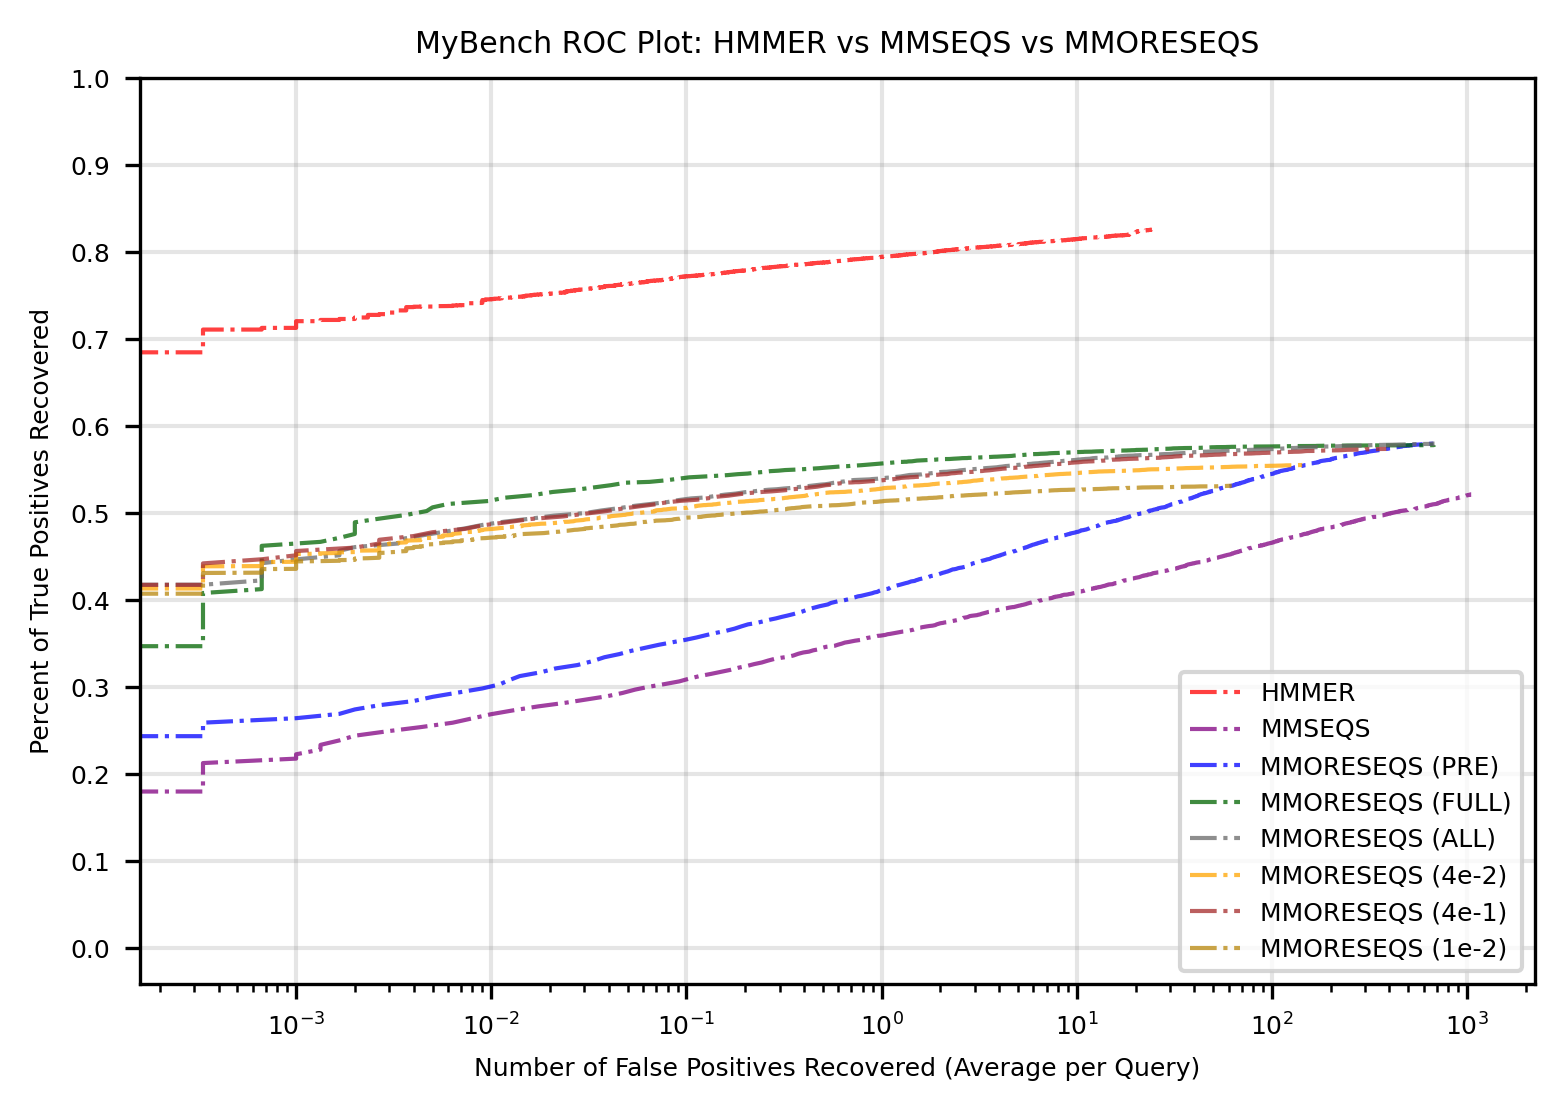

In [224]:
my_data = [  hmmer_data, mmseqs_k95_data2, mmseqs_k80_data3, mmore_full_data, mmore_norm_data, mmore_9e4_data, mmore_8e5_data, mmore_2e4_data ]
my_colors  = [ 'red', 'purple', 'blue', 'darkgreen', 'dimgray', 'orange', 'brown', 'darkgoldenrod' ]
my_labels  = [ 'HMMER', 'MMSEQS', 'MMORESEQS (PRE)', 'MMORESEQS (FULL)', 'MMORESEQS (ALL)', 'MMORESEQS (4e-2)', 'MMORESEQS (4e-1)', 'MMORESEQS (1e-2)' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]

for x in range(len(my_data)):
    plt.plot( my_data[x]["roc_x"], my_data[x]["roc_y"], color=colors[x], label=labels[x], linestyle="-.", marker=None, linewidth=linewidths[x], alpha=0.75 )

yticks = [(x*0.1) for x in range(0,11,1)]
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
plt.yticks(yticks)
    
plt.title('MyBench ROC Plot: HMMER vs MMSEQS vs MMORESEQS')
plt.legend(loc='lower right')
plt.ylabel('Percent of True Positives Recovered')
plt.xlabel('Number of False Positives Recovered (Average per Query)')
plt.xscale('log')
plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

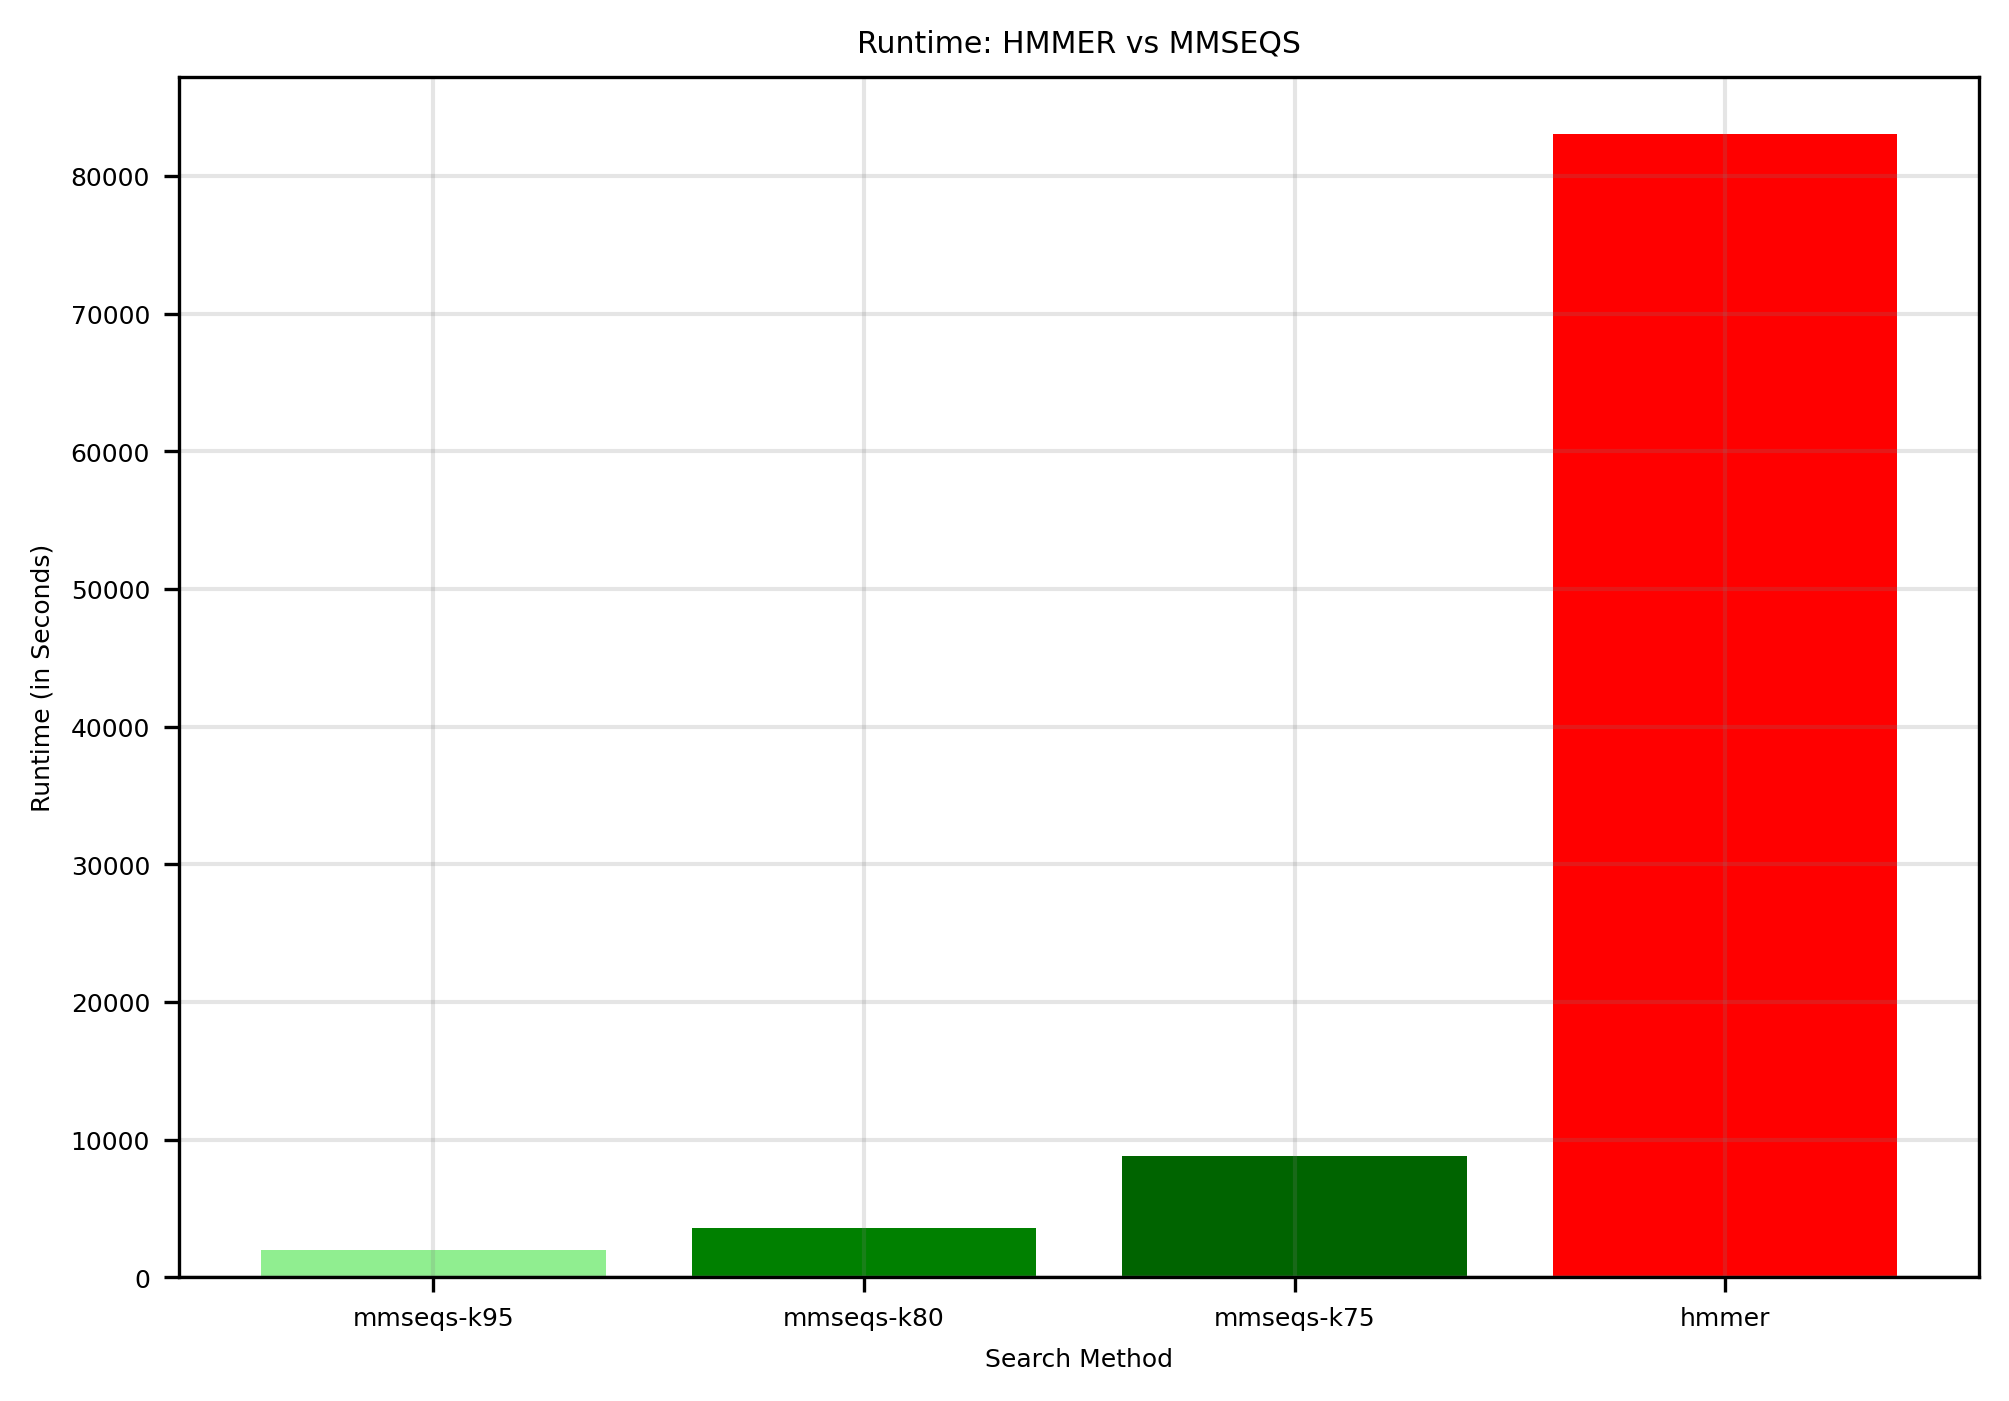

In [24]:
# compare mmseqs sensitivity runtimes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xlabels = ['mmseqs-k95', 'mmseqs-k80', 'mmseqs-k75', 'hmmer']
my_colors= ['lightgreen', 'green', 'darkgreen', 'red']
scalar = mmseqs_times['k95']
data_top = [ mmseqs_times['k95'], mmseqs_times['k80'], mmseqs_times['k75'], hmmer_times['search'] ]
data_btm = [                   0,                   0,                   0,                     0 ]

ax.bar(xlabels, data_top, color=my_colors)
ax.bar(xlabels, data_btm, color='black')
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)

plt.title('Runtime: HMMER vs MMSEQS')
plt.ylabel('Runtime (in Seconds)')
plt.xlabel('Search Method')
plt.show()

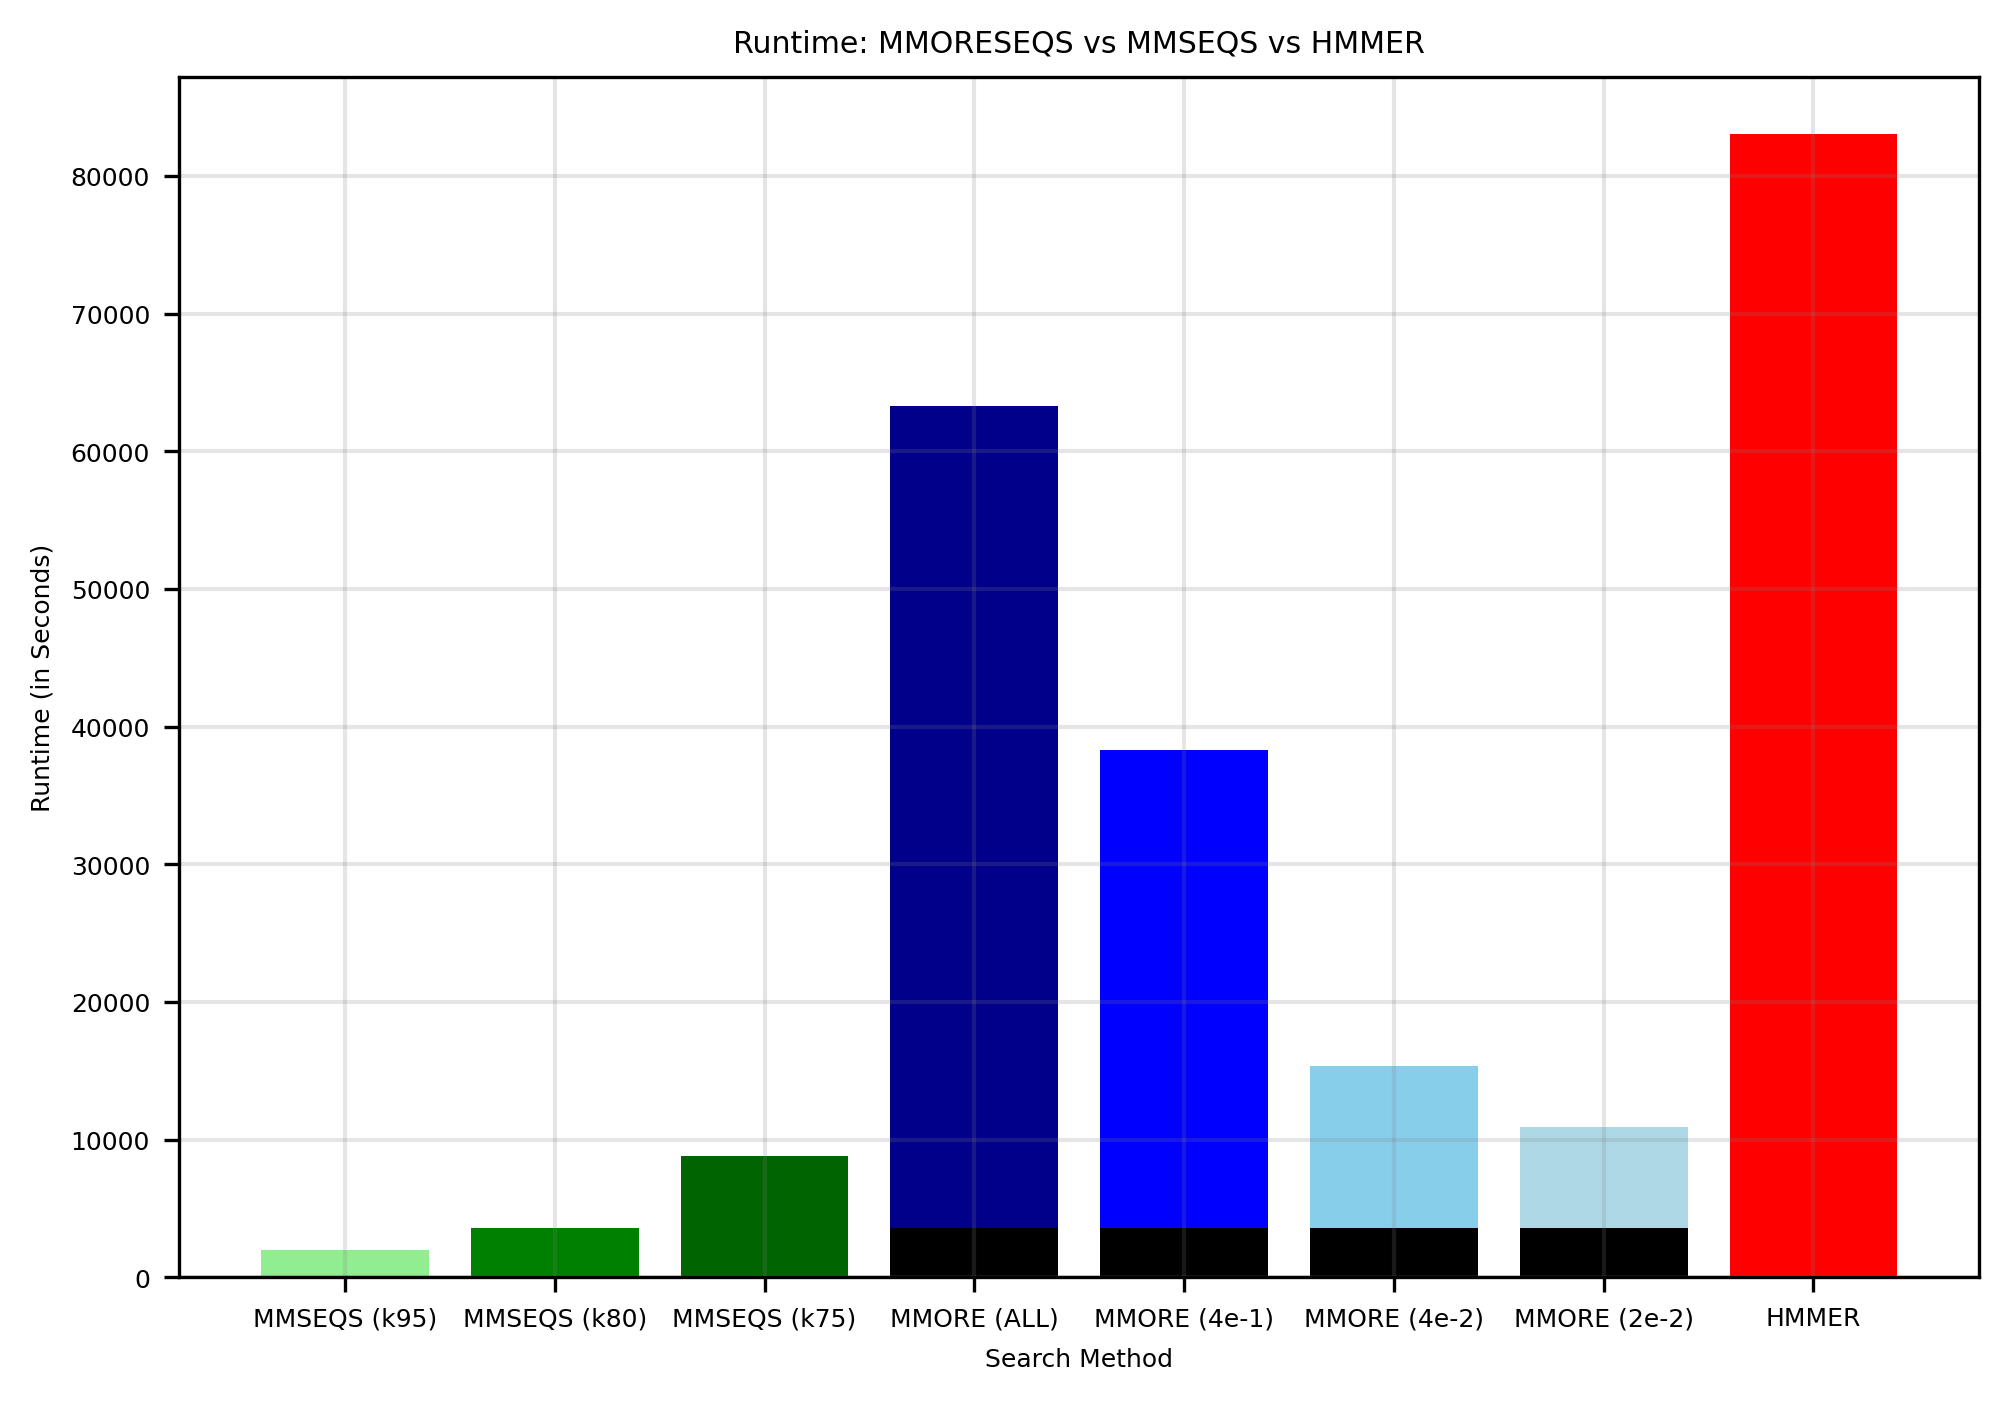

In [226]:
# compare mmseqs sensitivity runtimes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
xlabels = ['MMSEQS (k95)', 'MMSEQS (k80)', 'MMSEQS (k75)', 'MMORE (ALL)', 'MMORE (4e-1)', 'MMORE (4e-2)', 'MMORE (2e-2)', 'HMMER']
my_colors= ['lightgreen', 'green', 'darkgreen', 'darkblue', 'blue', 'skyblue', 'lightblue', 'red']
scalar = mmseqs_times['k95']
data_top = [ mmseqs_times['k95'], mmseqs_times['k80'], mmseqs_times['k75'], mmoreseqs_times["all"], mmoreseqs_times["7.6e5"], mmoreseqs_times["9.3e4"], mmoreseqs_times["4.1e4"], hmmer_times['search'] ]
data_btm = [ 0, 0, 0, mmseqs_times['k80'], mmseqs_times['k80'], mmseqs_times['k80'], mmseqs_times['k80'], 0 ]

ax.bar(xlabels, data_top, color=my_colors)
ax.bar(xlabels, data_btm, color='black')
plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)

plt.title('Runtime: MMORESEQS vs MMSEQS vs HMMER')
plt.ylabel('Runtime (in Seconds)')
plt.xlabel('Search Method')
plt.show()

In [124]:
label_dict = {}
for i,label in enumerate(labels):
    label_dict[label] = i
    print(i, ":", label)
    
print("auc_ffps:", len(auc_ffps))
print("auc_fdrs:", len(auc_fdrs))

0 : HMMER
1 : MMSEQS (k75) [1]
2 : MMSEQS (k80) [1]
3 : MMSEQS (k95) [1]
4 : MMSEQS (k75) [2]
5 : MMSEQS (k80) [2]
6 : MMSEQS (k95) [2]
7 : MMSEQS (k80-S2S) [3]
8 : MMSEQS (k80-P2S) [4]
9 : MMORE (ALL)
10 : MMORE (NO BIAS)
11 : MMORE (FULL FWDBACK)
12 : MMORE (e8e5)
13 : MMORE (e9e4)
14 : MMORE (e2e4)
15 : MMORE (pALL) [1]
16 : MMORE (p1e4)
17 : MMORE (p8e3)
18 : MMORE (p1e3)
19 : MMORE (pALL) [2]
20 : MMORE (pALL) [3]
21 : MMORE (8,16)
22 : MMORE (8,20)
23 : MMORE (8,24)
24 : MMORE (12,16)
25 : MMORE (12,20)
26 : MMORE (12,24)
27 : MMORE (16,16)
28 : MMORE (16,20)
29 : MMORE (16,24)
auc_ffps: 30
auc_fdrs: 30


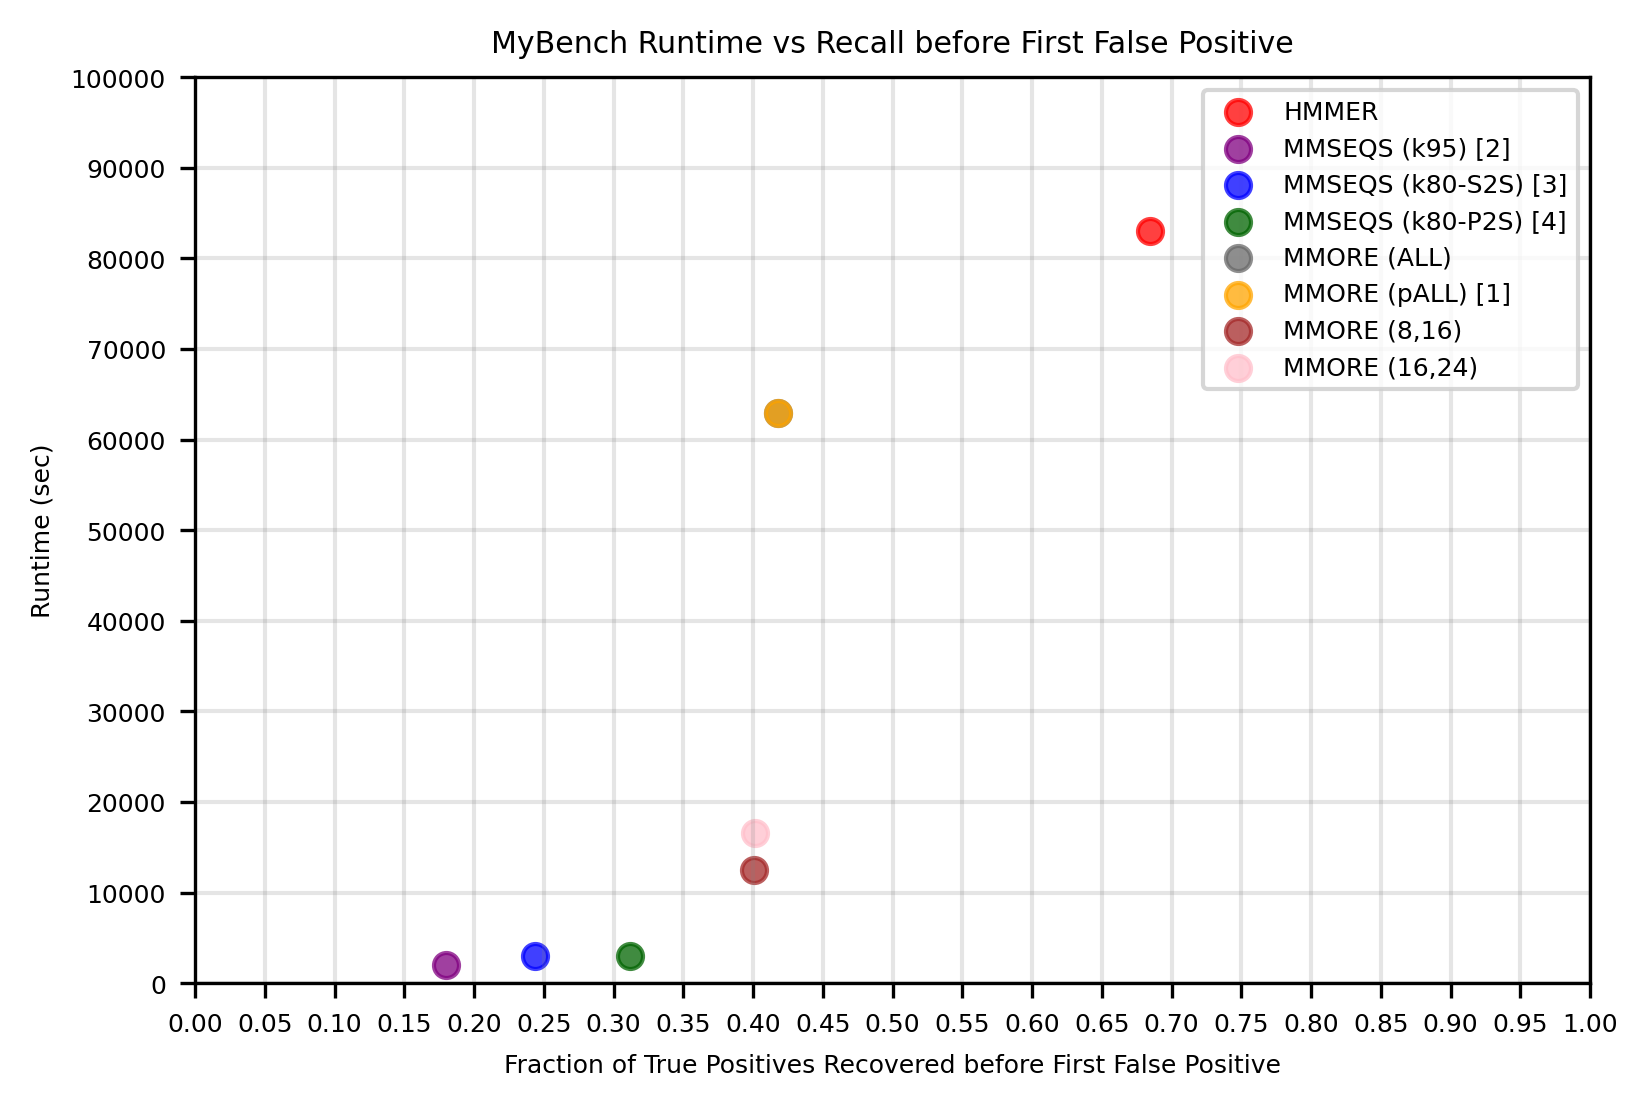

In [150]:
my_colors  = [ 'red', 'purple', 'blue', 'darkgreen', 'dimgray', 'orange', 'brown', 'pink', 'teal' ]
my_labels  = [ 'HMMER', 'MMSEQS', 'MMORESEQS (PRE)', 'MMORESEQS (FULL)', 'MMORESEQS (ALL)', 'MMORESEQS (4e-2)', 'MMORESEQS (4e-1)', 'MMORESEQS (1e-2)' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]

selected_data = [0, 6, 7, 8, 9, 15, 21, 29]

# runtime vs FFP
for i, x in enumerate(selected_data):
#     print( auc_ffps[x], runtimes[x] )
    plt.scatter( auc_ffps[x], runtimes[x], color=my_colors[i], label=labels[x], linestyle="-", linewidth=my_linewidths[i], alpha=0.75, marker='o' )

xticks = np.linspace(0, 1, 20 + 1)
plt.xticks(xticks)
yticks = np.linspace(0, 100000, 10 + 1)
plt.yticks(yticks)

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
    
plt.title('MyBench Runtime vs Recall before First False Positive')
plt.legend(loc='best')
plt.ylabel('Runtime (sec)')
plt.xlabel('Fraction of True Positives Recovered before First False Positive')
# plt.yscale('log')
plt.xlim(0,1)
plt.ylim(0, 100000)

# plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

0.737125468164794 83035.67
0.22817181647940074 1954.58
0.26919475655430714 3042.64
0.33222144194756553 3042.64
0.46500468164794007 62935.34
0.45271535580524347 62935.34
0.4504330524344569 62935.34
0.465063202247191 62935.34
0.45417837078651685 12528.619999999999
0.4600889513108614 16624.94


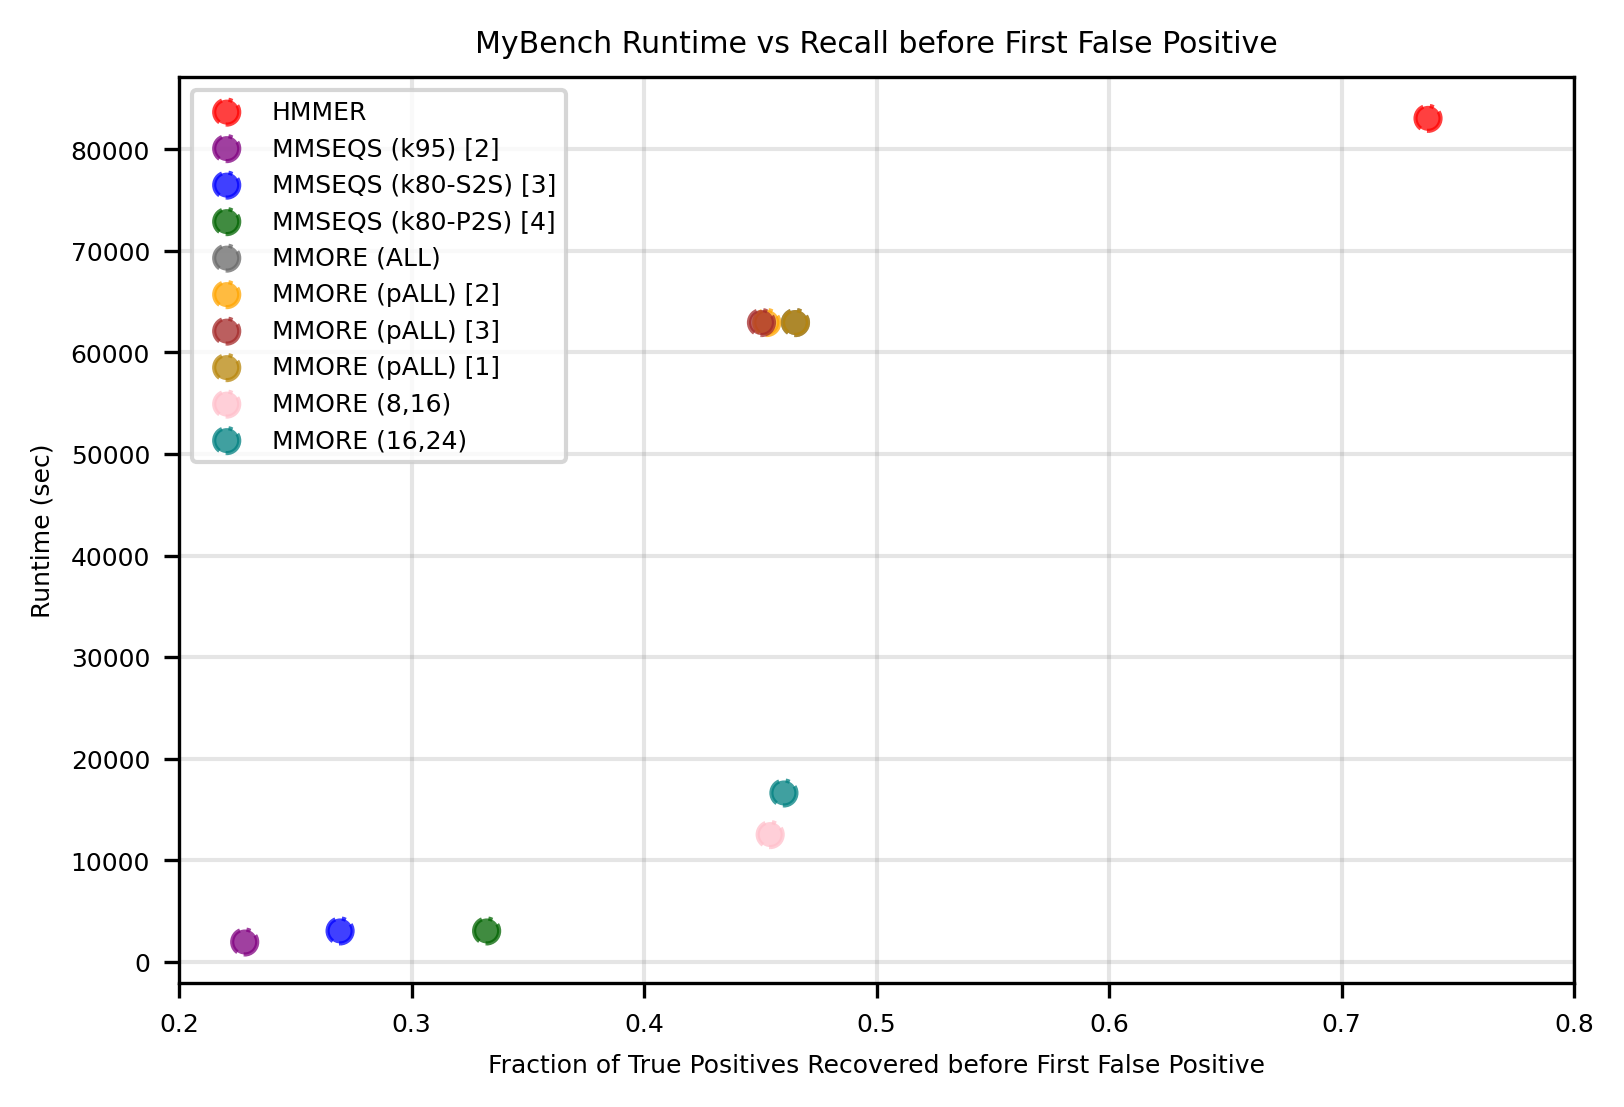

In [134]:
my_colors  = [ 'red', 'purple', 'blue', 'darkgreen', 'dimgray', 'orange', 'brown', 'darkgoldenrod', 'pink', 'teal' ]
my_labels  = [ 'HMMER', 'MMSEQS', 'MMORESEQS (PRE)', 'MMORESEQS (FULL)', 'MMORESEQS (ALL)', 'MMORESEQS (4e-2)', 'MMORESEQS (4e-1)', 'MMORESEQS (1e-2)' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]

selected_data = [0, 6, 7, 8, 9, 19, 20, 15, 21, 29]

# runtime vs FFP
for i, x in enumerate(selected_data):
    print( auc_fdrs[x], runtimes[x] )
    plt.scatter( auc_fdrs[x], runtimes[x], color=my_colors[i], label=labels[x], linestyle="-.", linewidth=my_linewidths[i], alpha=0.75 )

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
    
plt.title('MyBench Runtime vs Recall before First False Positive')
plt.legend(loc='best')
plt.ylabel('Runtime (sec)')
plt.xlabel('Fraction of True Positives Recovered before First False Positive')
plt.xlim(0.2,0.8)
# plt.yscale('log')
# plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()

0.6846910112359551 83035.67
0.17995084269662923 12055.59
0.243562734082397 19274.64
0.31203183520599254 19274.64
0.41760299625468167 79167.34
0.41754447565543074 79167.34
0.4297752808988764 19997.35
0.4174859550561798 78325.85
0.41058052434456926 25377.66


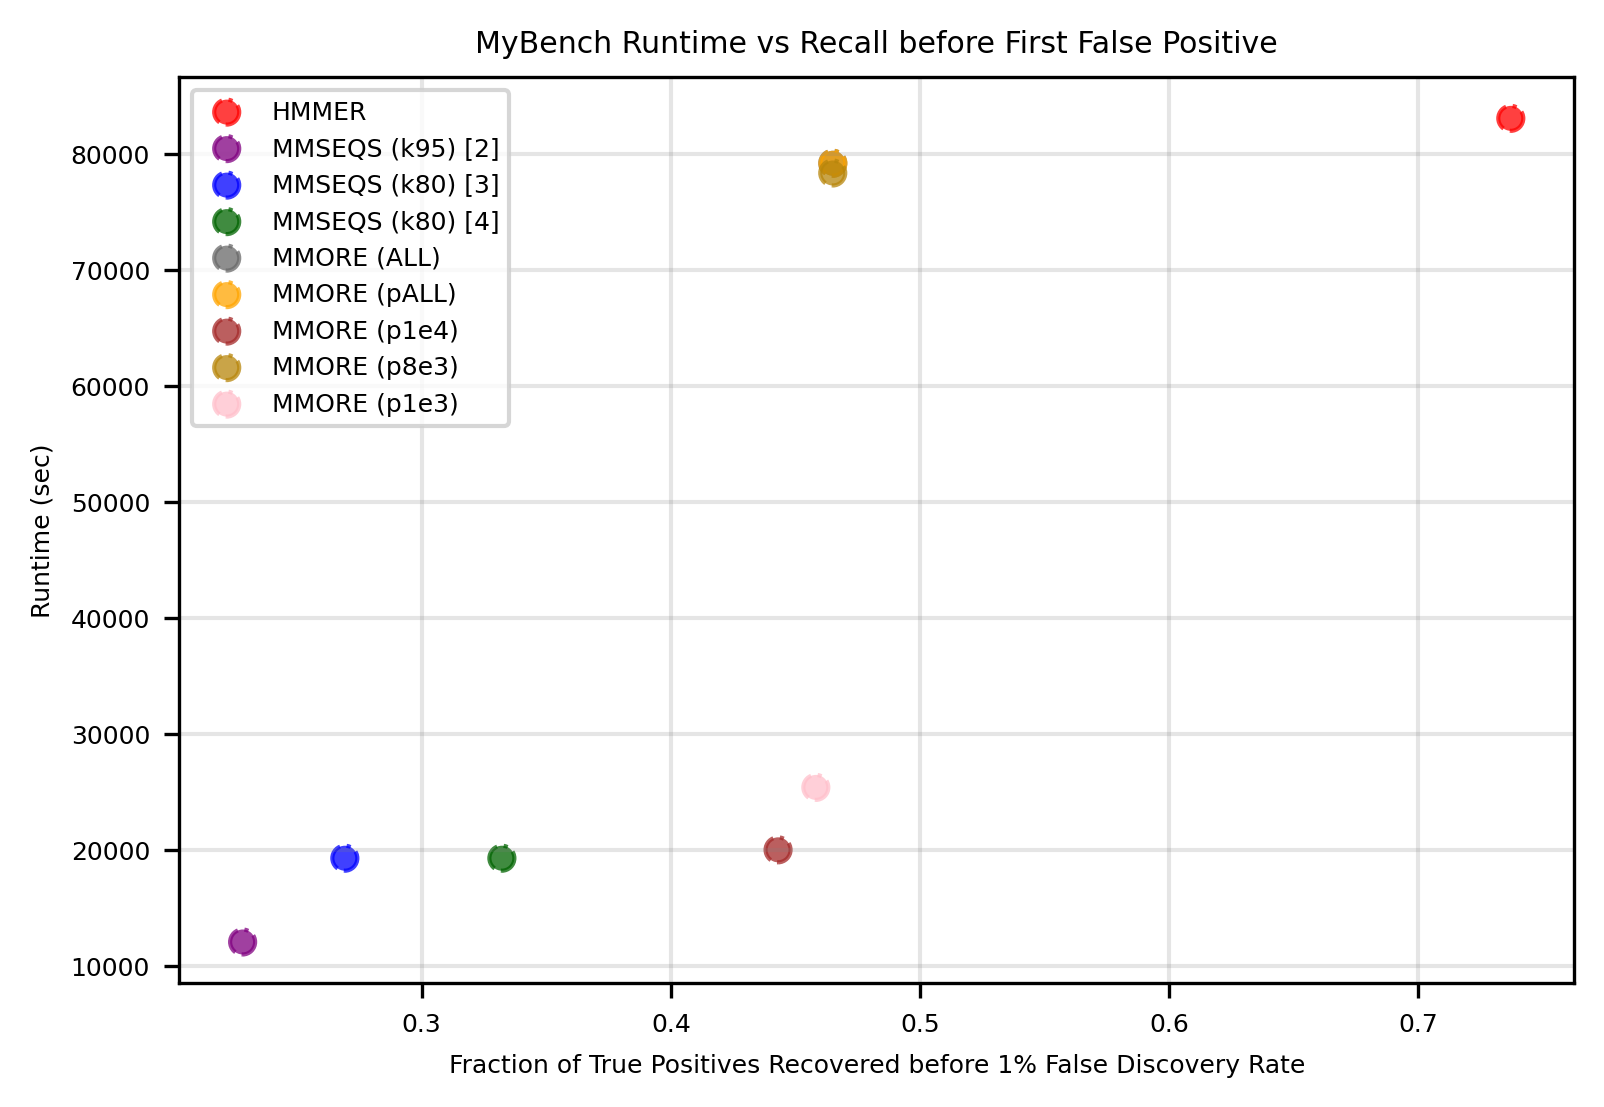

In [113]:
my_colors  = [ 'red', 'purple', 'blue', 'darkgreen', 'dimgray', 'orange', 'brown', 'darkgoldenrod', 'pink' ]
my_labels  = [ 'HMMER', 'MMSEQS', 'MMORESEQS (PRE)', 'MMORESEQS (FULL)', 'MMORESEQS (ALL)', 'MMORESEQS (4e-2)', 'MMORESEQS (4e-1)', 'MMORESEQS (1e-2)' ]
my_linewidths = [ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0 ]

selected_data = [0, 6, 7, 8, 9, 15, 16, 17, 18]

# runtime vs FDR1%
for i, x in enumerate(selected_data):
    print( auc_ffps[x], runtimes[x] )
    plt.scatter( auc_fdrs[x], runtimes[x], color=my_colors[i], label=labels[x], linestyle="-.", linewidth=my_linewidths[i], alpha=0.75 )

plt.grid(color='gray', linestyle='-', linewidth=1, alpha=0.2)
    
plt.title('MyBench Runtime vs Recall before First False Positive')
plt.legend(loc='upper left')
plt.ylabel('Runtime (sec)')
plt.xlabel('Fraction of True Positives Recovered before 1% False Discovery Rate')
# plt.xscale('log')
# plt.savefig("visuals/mmseqs-hmmer-fbpruner-roc-plot.jpg")
plt.show()